<a href="https://colab.research.google.com/github/hhboorstein/ds_portfolio/blob/main/Henningsen_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# math and data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model building libraries
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
import sklearn.tree as tree

# model assessment
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics

In [ ]:
# pandas display options
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)

In [ ]:
inn=pd.read_csv('INNHotelsGroup.csv')

In [ ]:
df=inn.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
inn.sample(10,random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


Many of the features, despite being numerical-type columns, appear to be categorical. For example, required car parking space is simply a yes or no encoded with 1 or 0. We will have to convert these columns to categorical data type later.

There does appear to be some missing data in the meal plan column: 'Not Selected' is recorded for some bookings.

All the bookings in our sample were made online. While there are likely other values for this feature, it is interesting that 'Online' is so prevalent as to dominate our sample.

In [ ]:
inn.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


Looking at the columns of our data that contain strings, we find first that Booking_ID has no repeats, as the mode only has frequency of 1. This indicates an integrity of the data: There are no duplicate records. Meal plan 1 is the most common, as is room type 1. The majority of bookings are initiated online, and (thankfully) the majority of bookings are *not* cancelled.

In [ ]:
inn.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* The number of adults on a booking ranges from 0 to 4, although it looks like the most common number is 2. 
* Between the minimum value and the 75th quartile, the number of children is 0, but the maximum is 10, indicating there may be outliers in the data.
* Number of weekend nights and weekday nights have maxima greater than 2 and 5 respectively, indicating the presence of multi-week bookings in the data set.
* Arrival year seems to be either 2017 or 2018.
* Repeated guest looks like a binary value: yes or no.
* The average price per room ranges from 0€ to 540€, with a median of 99.45€ and a mean of 103.42€. I wonder how there could be a room offered for 0€? We should investigate later.

In [ ]:
inn.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no null values in any of the columns, though there may still be missing data, as was described above.

In [ ]:
inn.duplicated().sum()

0

There are no duplicate rows.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Let's look at the values in each object column.

In [ ]:
for col in inn.drop('Booking_ID',axis=1).select_dtypes('object').columns:
  print(inn[col].value_counts())
  print('-'*20)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
--------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
--------------------
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
--------------------
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
--------------------


These columns all contain categorical data. There are three options for meal plan, with plan 1 (just breakfast) being the most common. There are seven room types, with type 1 being most common and type 3 the least. About twice as many reservations are made online as offline. Similarly, the ratio of reservations that were not cancelled to those that were is *roughly* 2:1.

Note: Though only the above columns are labelled as objects, we saw in the sample and the data dictionary that some of the numerical columns are categorical as well.

In [ ]:
# visualization functions

def count_fig(df,col,*,sort=None,rotate=False):
  '''Countplot of df[col]
  ordered by value counts.'''
  plt.figure(figsize=(8,5))
  plt.title('Countplot of '+str(col))

  # plot with sort logic
  if sort=='value_counts':
    order_tag=df[col].value_counts().index
  else:
    order_tag=None
  sns.countplot(data=df,x=col,order=order_tag)

  # xticks rotation
  if rotate==True:
    rot='vertical'
  else:
    rot='horizontal'
  plt.xticks(rotation=rot)
  return

def plott(title=None):
  '''Quick figure setup.'''
  fig=plt.figure(figsize=(8,5))
  plt.title(title,fontsize=15)
  return fig

def hist_box(df,col,*,kde=False):
  '''Plot a histogram and boxplot 
  of numeric column in data frame.
  Optional KDE boolean.'''

  # figure setup
  plt.figure(figsize=(12,5))

  # histogram
  plt.subplot(1,2,1)
  plt.title('Histogram of '+str(col),fontsize=14)
  sns.histplot(data=df,x=col,kde=kde)

  # boxplot
  plt.subplot(1,2,2)
  plt.title('Boxplot of '+str(col),fontsize=14)
  sns.boxplot(data=df,x=col)

  # display figure
  plt.tight_layout()
  return

In [ ]:
# set plotting theme
sns.set_theme()

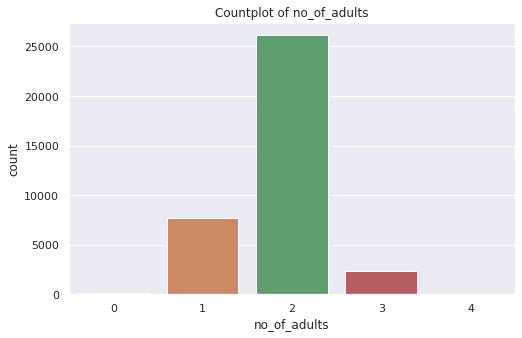

In [ ]:
count_fig(inn,'no_of_adults')

In [ ]:
inn['no_of_adults'].value_counts(normalize=True)

2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64

The vast majority of bookings include 2 adults. There are a few that have either 0 or 4 adults, but these are rare (0.4% and 0.04% respectively).

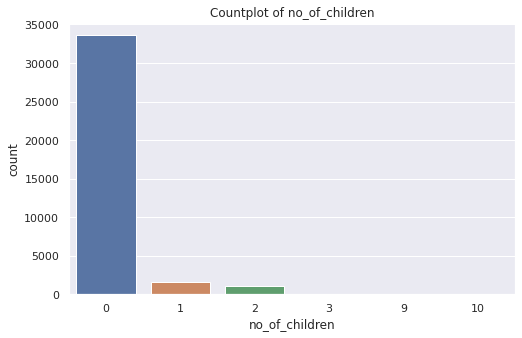

In [ ]:
count_fig(inn,'no_of_children')

In [ ]:
inn['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Almost all bookings include 0 children. There are also bookings that include 3, 9, or 10 children, but these are so few that we could consider them outliers.

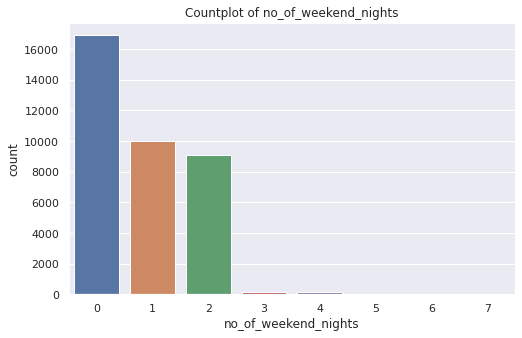

In [ ]:
count_fig(inn,'no_of_weekend_nights')

In [ ]:
inn['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

While many bookings include 1 or 2 weekend nights, most do not! This means INN Hotels sees more business on weekdays. There also appears to be some outliers present, namely 7 nights.

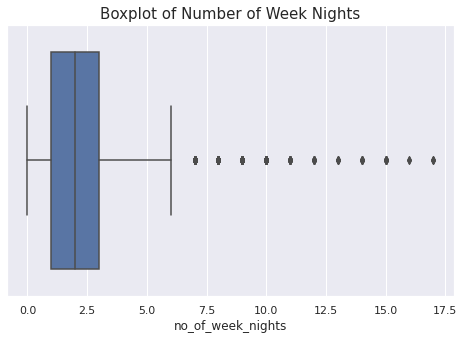

In [ ]:
plott('Boxplot of Number of Week Nights')
sns.boxplot(data=inn,x='no_of_week_nights');

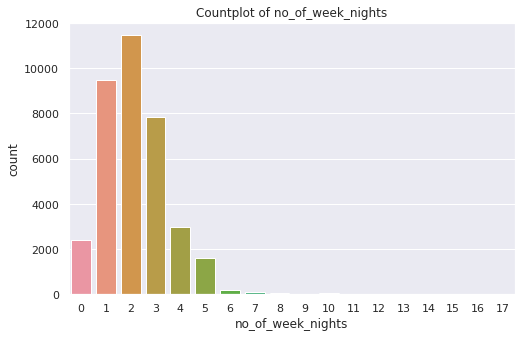

In [ ]:
count_fig(inn,'no_of_week_nights')

In [ ]:
inn['no_of_week_nights'].value_counts(normalize=True)

2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64

Most bookings do not span more than one week. The most common booking is 2 week nights, but there are many with 0 week nights (presumably all weekend bookings). There are scarely few records with more than 10 week nights (two weeks) booked. We will treat these as outliers and remove them from the data.

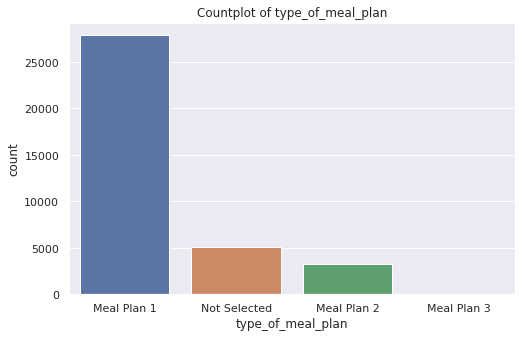

In [ ]:
count_fig(inn,'type_of_meal_plan',sort='value_counts')

Meal plan 1 (just breakfast) is the most common type. Very few guests choose full board (plan 3), and many select no meal plan. We will *not* treat the latter as missing data, however, as many may bring their own food or eat out, thus not requiring any dining accomodations.

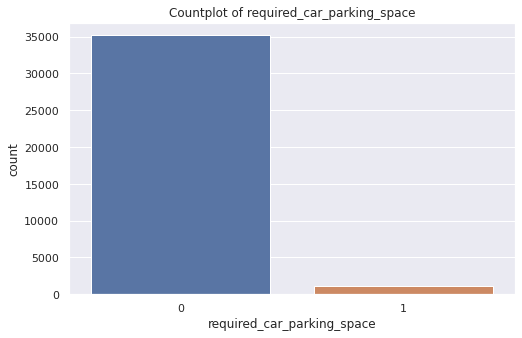

In [ ]:
count_fig(inn,'required_car_parking_space')

Few guests require parking accomodations.

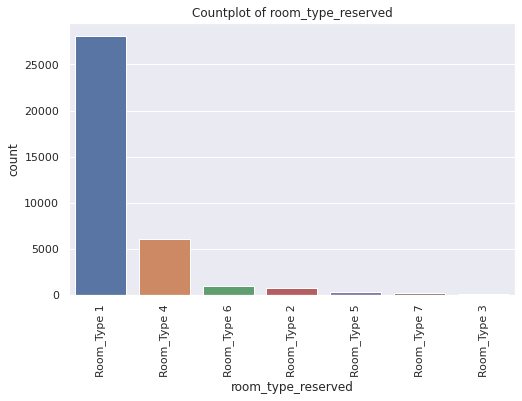

In [ ]:
count_fig(inn,'room_type_reserved',sort='value_counts',rotate=True)

In [ ]:
inn['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Room type 1 is most common. It is odd that type 3 has almost no records, but we will not remove these records: This would remove an entire class from this categorical variable.

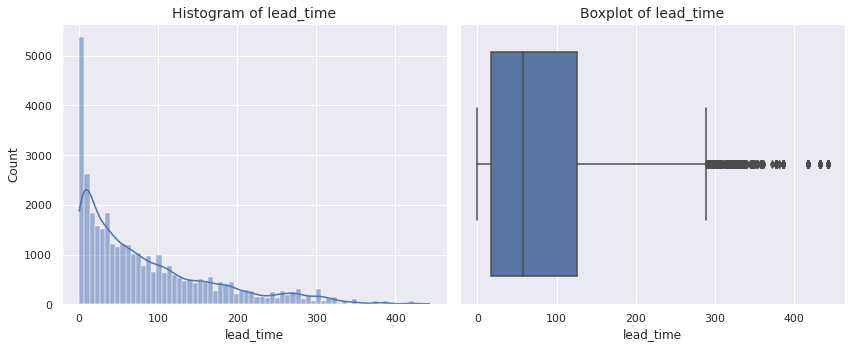

In [ ]:
hist_box(inn,'lead_time',kde=True)

In [ ]:
a=inn.loc[inn['lead_time']>400].shape[0]
print('There are {} reservations with a lead time greater than 400 days.'.format(a))

There are 102 reservations with a lead time greater than 400 days.


Lead time is the number of days in advance the room is reserved. Many rooms are booking same-day, and the general trend shows a steady decline in frequency as the lead time incleases. Put another way, fewer people reserve further in advance.

There are 102 reservations with a lead time greater than 400 days. With such a wide spread in this data, there are many apparent outliers on the high end. We will keep these extreme values, as they are approximately continuously distributed and do not necessarily represent anomolous behavior. 

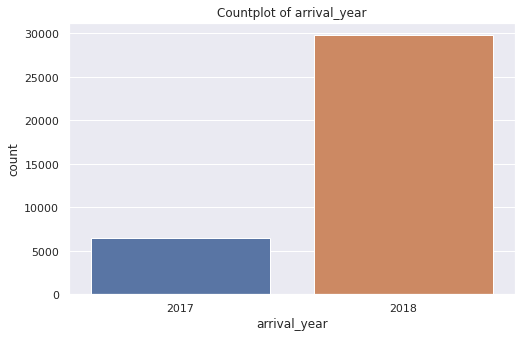

In [ ]:
count_fig(inn,'arrival_year')

In [ ]:
inn['arrival_year'].value_counts(normalize=True)

2018    0.820427
2017    0.179573
Name: arrival_year, dtype: float64

Around 82% of reservations were for dates in 2018. We only have records for 2017 and 2018.

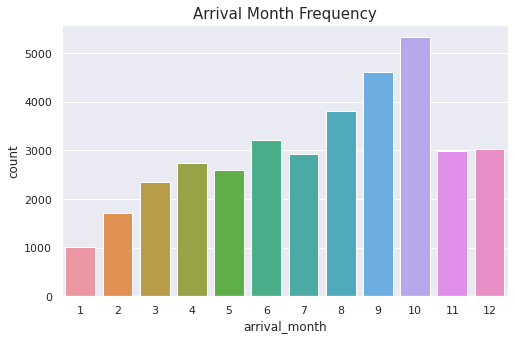

In [ ]:
plott('Arrival Month Frequency')
sns.countplot(data=inn,x='arrival_month');

Fall reservations (August, September, October) are most common, while winter (November, December, January, February) sees a steep decline.

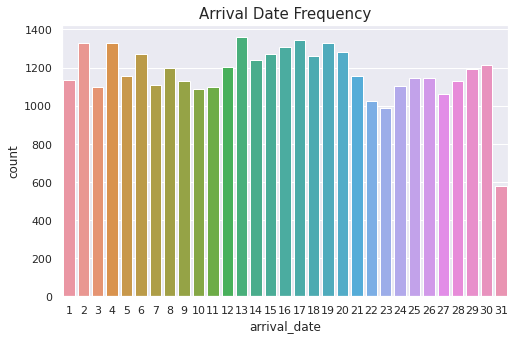

In [ ]:
plott('Arrival Date Frequency')
sns.countplot(data=inn,x='arrival_date');

Arrival date fluctuates throughout the month, with reservations in week three (15th-21st) being apparently most common. Note that the 31st has far fewer than the rest: This is simply because not all months have 31 days.

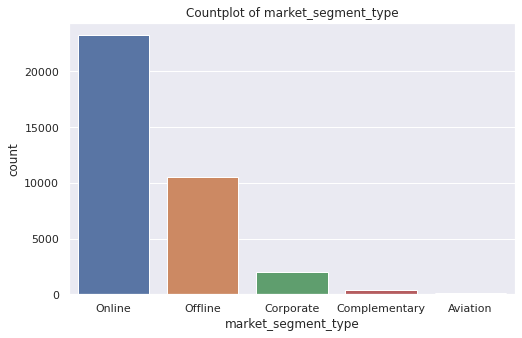

In [ ]:
count_fig(inn,'market_segment_type',sort='value_counts')

About twice as many reservations are made online as offline. Corporate and complementary reservations are less common, and aviation bookings are rare.

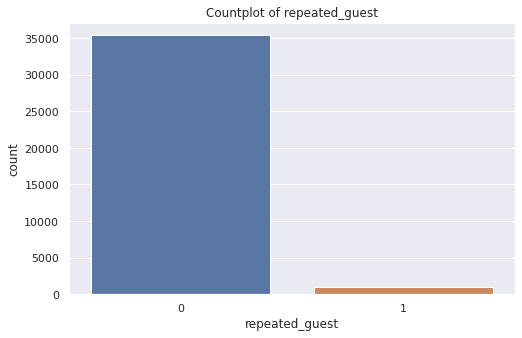

In [ ]:
count_fig(inn,'repeated_guest')

Nearly all of the guests are new. Returning guests make up only a small percentage of bookings. This is an area of growth for INN Hotels, as returning customers are generally satisfied with the accomodations and can be counted on for future business.

In [ ]:
inn['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

Thankfully, most guests have never previously cancelled.

However: Note that most guests are not repeats. It would be more insightful to look at the number of bookings cancelled by returning guests.

In [ ]:
a=inn.loc[inn['repeated_guest']==1]['no_of_previous_cancellations'].value_counts(normalize=True)
print('Percent returning guests with at least one cancellation:',a.drop(0,axis=0).sum())
print('='*10+' data '+'='*10)
print(a)

Percent returning guests with at least one cancellation: 0.36344086021505373
========== data ==========
0     0.636559
1     0.212903
2     0.049462
3     0.046237
11    0.026882
5     0.011828
4     0.010753
13    0.004301
6     0.001075
Name: no_of_previous_cancellations, dtype: float64


About 36% of repeated guests have at least one previous cancellation, which means nearly two-thirds don't cancel. Still, there is room for improvement here.

In [ ]:
inn.loc[inn['repeated_guest']==1]['booking_status'].value_counts(normalize=True)

Not_Canceled    0.982796
Canceled        0.017204
Name: booking_status, dtype: float64

While some returning guests had previously cancelled, only 1.7% of returning guests cancelled their current booking. That's fantastic customer loyalty!

In [ ]:
print(inn['no_of_previous_bookings_not_canceled'].value_counts().to_dict())

{0: 35463, 1: 228, 2: 112, 3: 80, 4: 65, 5: 60, 6: 36, 7: 24, 8: 23, 10: 19, 9: 19, 11: 15, 12: 12, 14: 9, 15: 8, 16: 7, 13: 7, 18: 6, 20: 6, 21: 6, 17: 6, 19: 6, 22: 6, 25: 3, 27: 3, 24: 3, 23: 3, 44: 2, 29: 2, 48: 2, 28: 2, 30: 2, 32: 2, 31: 2, 26: 2, 46: 1, 55: 1, 45: 1, 57: 1, 53: 1, 54: 1, 58: 1, 41: 1, 40: 1, 43: 1, 35: 1, 50: 1, 56: 1, 33: 1, 37: 1, 42: 1, 51: 1, 38: 1, 34: 1, 39: 1, 52: 1, 49: 1, 47: 1, 36: 1}


In [ ]:
inn['no_of_previous_bookings_not_canceled'].nunique()

59

As most records are for first-time guests, there is an over-abundance of 0 in the no_of_previous_bookings_not_canceled column. Also common is 1 and 2 bookings, but the data trails off all the way to 59 kept reservations.

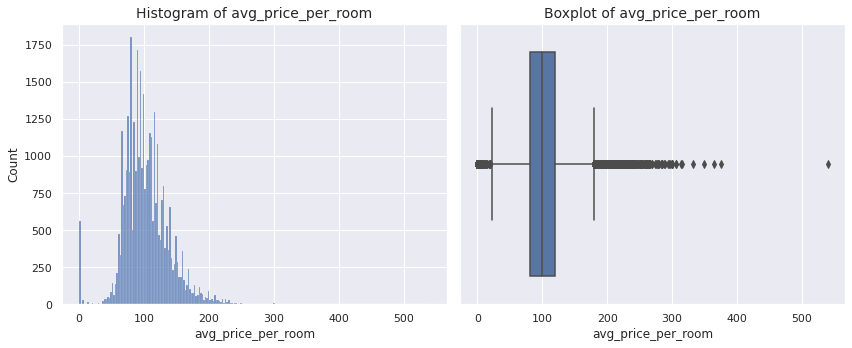

In [ ]:
hist_box(inn,'avg_price_per_room')

In [ ]:
inn.loc[inn['avg_price_per_room']>400]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled


In [ ]:
print('Number of rooms with price 0€:',
      inn['avg_price_per_room'].value_counts()[0])

Number of rooms with price 0€: 545


Most of the rooms are priced around 100€, somewhere between about 50€ and 200€. There are many apparent outliers on the high end of the prices, but most look suitable for the feature. All but one of the prices are less than 400€; the remaining record is a room priced at 540€. While the rest of this record does not look erroneous, we will nonetheless excise it, as the price is so far outside the scope of our data.

Rooms priced at 0€ indicate missing data. We will address this in our data processing.

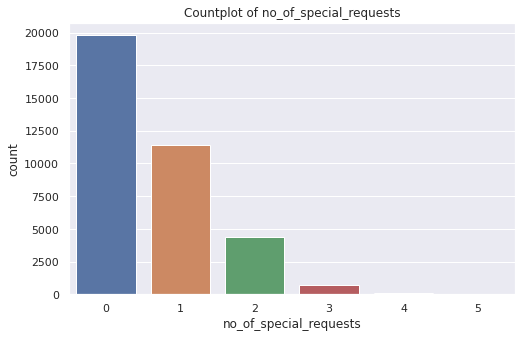

In [ ]:
count_fig(inn,'no_of_special_requests')

In [ ]:
a=inn['no_of_special_requests'].value_counts().drop(0,axis=0).sum()
print('There were {} special requests.'.format(a))

There were 16498 special requests.


Thankfully, most guests do not have any special requests. There were still over 16,000 special requests made in INN Hotels bookings, though thankfully there were scarcely few bookings with more than 3 special requests.

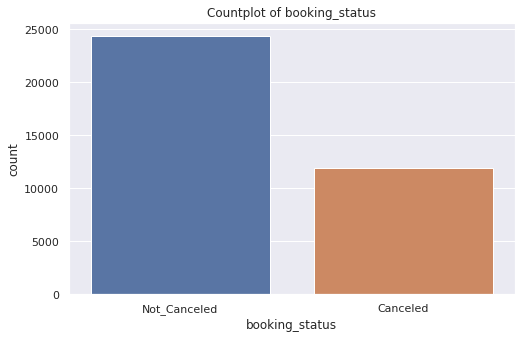

In [ ]:
count_fig(inn,'booking_status')

In [ ]:
inn['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

About a third of bookings at INN Hotels are cancelled.

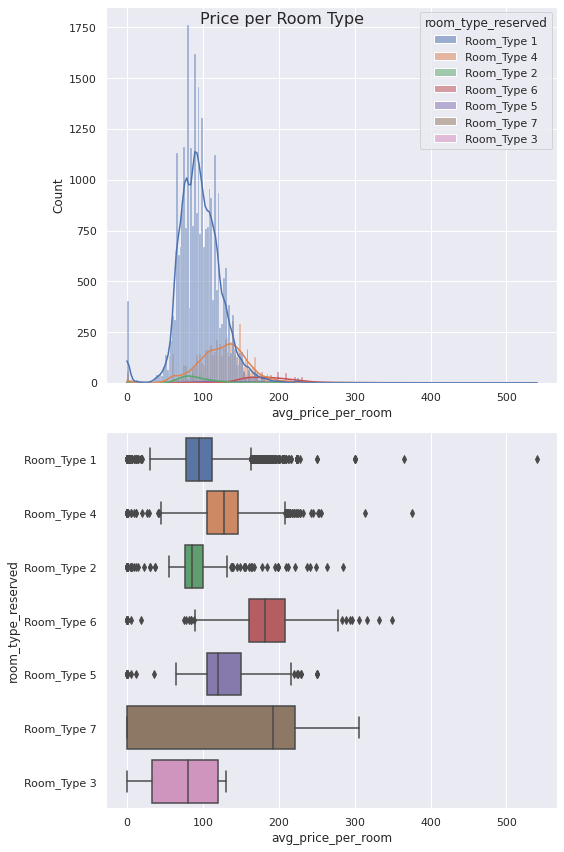

In [ ]:
plt.figure(figsize=(8,12))
plt.suptitle('Price per Room Type',fontsize=16)

# histogram
plt.subplot(2,1,1)
sns.histplot(data=inn,x='avg_price_per_room',hue='room_type_reserved',kde=True)

# boxplot
plt.subplot(2,1,2)
sns.boxplot(data=inn,x='avg_price_per_room',y='room_type_reserved')

plt.tight_layout()

We can see again that room type 1 is by far the most common type in our records. Looking at the KDE, type 2 appears to have a slightly lower mean price, while types 4 and 6 skew higher.

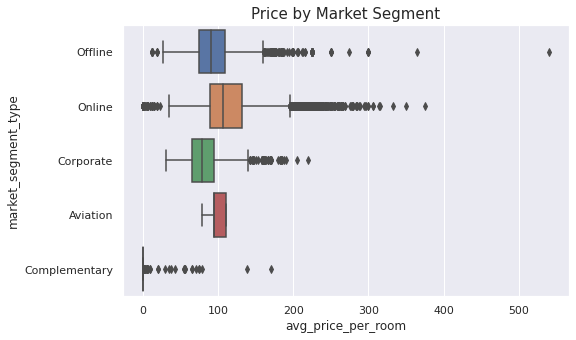

In [ ]:
plott('Price by Market Segment')
sns.boxplot(data=inn,x='avg_price_per_room',y='market_segment_type');

In [ ]:
inn.groupby(by='market_segment_type')['avg_price_per_room'].mean()

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64

Prices vary significantly by market segment. Complementary bookings are understandably the cheapest. Aviation skews higher than Corporate, with the middle 50% of aviation data landing fully above the middle 50% of corporate data. Online prices appear higher, in fact, than offline, the opposite of what I would have expected. The mean prices by market segment are shown above. Complementary rooms may have come with additional charges, like room service, that brough up the mean price. Online bookings have the highest mean price, followed by aviation, though the former sees great influence from extreme values.

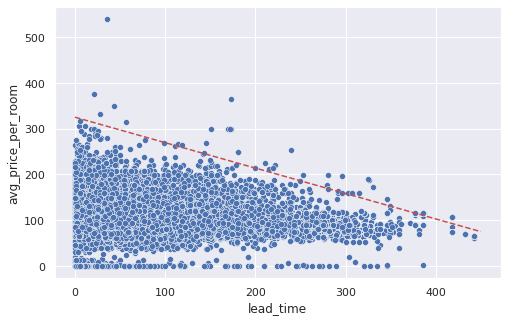

In [ ]:
plott()
sns.scatterplot(data=inn,x='lead_time',y='avg_price_per_room')
plt.plot((0,450),(325,75),color='r',linestyle='--');

With some reservations, booking earlier affords the guest a better deal. Here the data is mixed: Sometimes booking the same day can be affordable.

Note that, while the data is noisy, it forms a triangle in the lower left corner. This aligns with prices being lower with longer lead times. That is to say, while the pattern is not so readily apparent, there is a trend to this data.

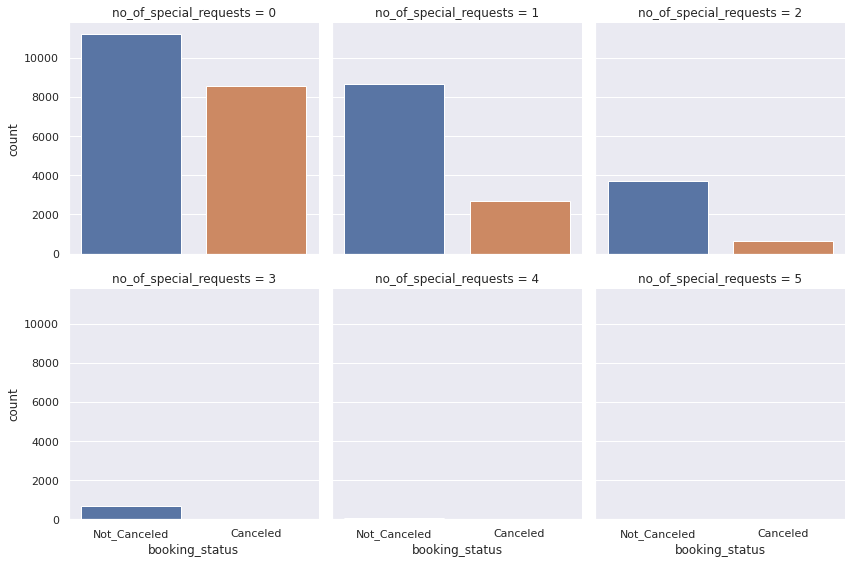

In [ ]:
sns.catplot(data=inn,
            x='booking_status',
            col='no_of_special_requests',
            kind='count',
            col_wrap=3,
            height=4,
            aspect=1);

Let's start looking at cancellations. Above we see the ratio of cancellations to kept bookings, broken down by the number of special requests. It seems that bookings with 0 special requests are more likely to be cancelled than those with at least one special request.

In [ ]:
# collect cancellations by month
can_by_month={}
for month in range(1,13):
  can_by_month[month]=inn.groupby(by='arrival_month')['booking_status'].value_counts()[month]['Canceled']
can_by_month_df=pd.DataFrame.from_dict(can_by_month,orient='index',columns=['Cancellations'])

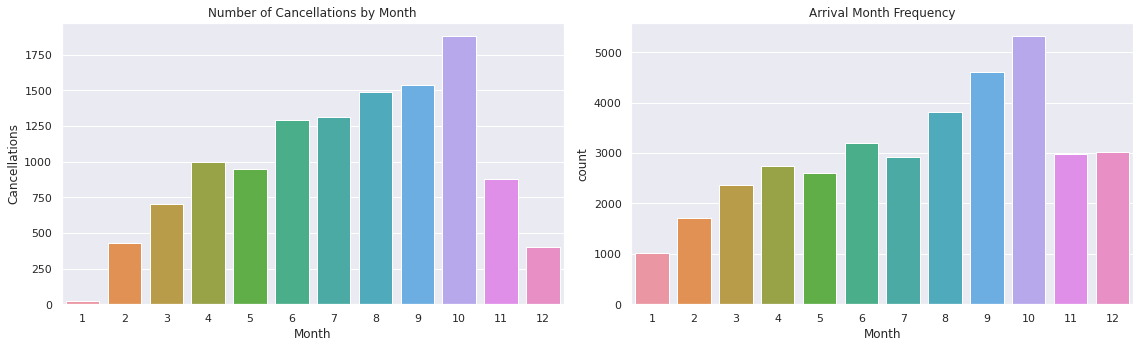

In [ ]:
plt.figure(figsize=(16,5))

# cancellations by month
plt.subplot(1,2,1)
plt.title('Number of Cancellations by Month')
sns.barplot(data=can_by_month_df,x=can_by_month_df.index,y='Cancellations')
plt.xlabel('Month')

# recall arrival frequency
plt.subplot(1,2,2)
plt.title('Arrival Month Frequency')
sns.countplot(data=inn,x='arrival_month')
plt.xlabel('Month')

plt.tight_layout()

The plot on the left shows cancellations by month. I would argue there's less to be gleaned here than one may initially think: The number of cancellations seem to be largely a function of the number of reservations made for each month. Recall the graph on the right.

The relationship between arrival month frequency and number of cancellations can be observed in the linear regression below.

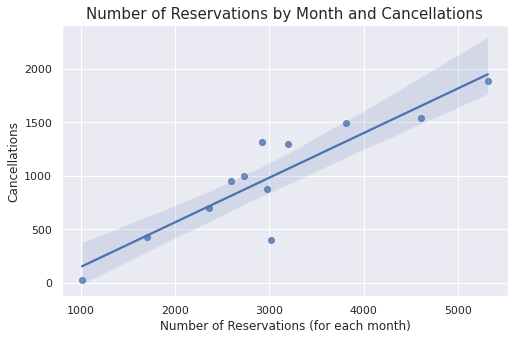

In [ ]:
plott('Number of Reservations by Month and Cancellations')
sns.regplot(x=inn['arrival_month'].value_counts().sort_index(),y=can_by_month_df)
plt.xlabel('Number of Reservations (for each month)');

The trend is quite plain, in fact: The more reservations there are in a month, the greater number of cancellations observed for that month.

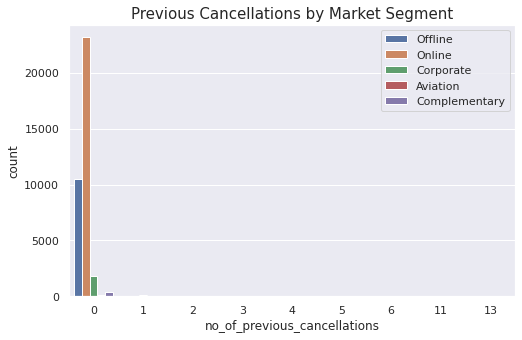

In [ ]:
plott('Previous Cancellations by Market Segment')
sns.countplot(data=inn,x='no_of_previous_cancellations',hue='market_segment_type')
plt.legend(loc='upper right');

Cancellation history is also an important factor. Let's see which market segments cancel most often.

We see that 0 previous cancellations dominates the data set. As discussed before, this is largely due to most guest being new, i.e., not returning. We can remove the 0s to get a clearer picture of the breakdown for the nonzero records.

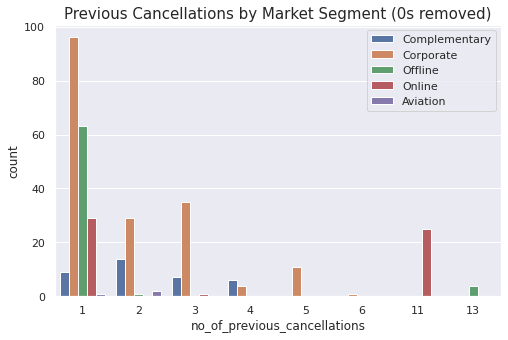

In [ ]:
plott('Previous Cancellations by Market Segment (0s removed)')
sns.countplot(data=inn.drop(inn.loc[inn['no_of_previous_cancellations']==0].index.tolist(),axis=0),
              x='no_of_previous_cancellations',
              hue='market_segment_type')
plt.legend(loc='upper right');

Without the 0s, the scale now allows for a clear view of the rest of the data. Corporate bookings appear most prone to cancellations, followed by either complementary or offline, depending on the number of previous cancellations. All told, online bookings are more reliable than I would have expected.

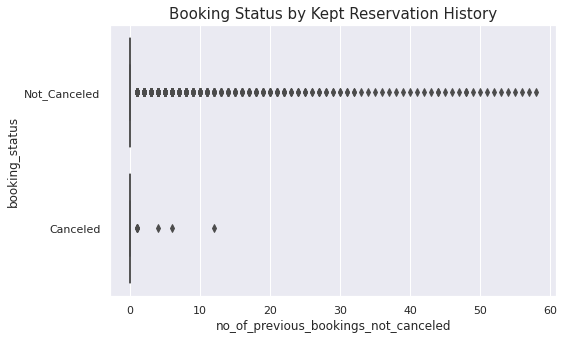

In [ ]:
plott('Booking Status by Kept Reservation History')
sns.boxplot(data=inn,x='no_of_previous_bookings_not_canceled',y='booking_status');

Now let's try to use past trends to inform cancellations. Here we plot number of previous bookings not cancelled versus the booking status for the current reservation. We see that the upper line (Not_Canceled) demonstrates that reliable past guests tend to keep their future reservations. We can remove the 0s again to get a better picture.

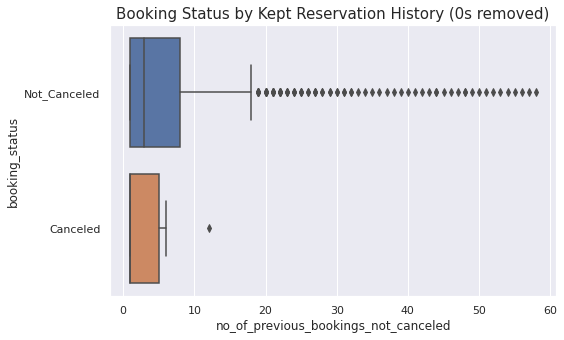

In [ ]:
plott('Booking Status by Kept Reservation History (0s removed)')
sns.boxplot(data=inn.drop(inn.loc[inn['no_of_previous_bookings_not_canceled']==0].index.tolist(),axis=0),
            x='no_of_previous_bookings_not_canceled',
            y='booking_status');

It is now more clear that cancelled bookings generally have fewer kept past reservations. Put another way: Past reliability appears to be a good indicator of future booking status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### missing value treatment

In [ ]:
# impute 0 with mean by room type
inn['avg_price_per_room'].replace(to_replace=0,value=np.nan,inplace=True)
mean_price=inn.groupby(by='room_type_reserved')['avg_price_per_room'].transform('mean')
inn['avg_price_per_room'].fillna(value=mean_price,inplace=True)

We start by imputing the average price per room to replace the 0€ values. We replaced 0 with the mean price by room type.

In [ ]:
a=inn.loc[(inn['no_of_week_nights']==0)&(inn['no_of_weekend_nights']==0)].shape[0]
print('There are {} records with 0 week nights AND 0 weekend nights.'.format(a))

There are 78 records with 0 week nights AND 0 weekend nights.


We found 78 records that list 0 for both week nights booked and weekend nights book. This is clearly an error! We must drop these records.

In [ ]:
drop_ids=inn.loc[(inn['no_of_week_nights']==0)&(inn['no_of_weekend_nights']==0)].index.tolist()
inn.drop(index=drop_ids,axis=0,inplace=True)

### outlier treatment

In [ ]:
# collect records to drop
drop_ids=inn.loc[inn['no_of_children']==9].index.tolist()
drop_ids+=inn.loc[inn['no_of_children']==10].index.tolist()
drop_ids+=inn.loc[inn['no_of_weekend_nights']==7].index.tolist()
drop_ids+=inn.loc[inn['no_of_week_nights']>10].index.tolist()
drop_ids+=inn.loc[inn['avg_price_per_room']>400].index.tolist()

# drop
inn.drop(index=drop_ids,axis=0,inplace=True)

See EDA above for drop justifications.

### preparing data

In [ ]:
# drop unique ID
inn.drop('Booking_ID',axis=1,inplace=True)

In [ ]:
# numerical encoding for booking_status
inn['booking_status'].replace({'Not_Canceled':0,'Canceled':1},inplace=True)

In [ ]:
# convert to categorical data type
cat_cols=['type_of_meal_plan',
          'required_car_parking_space',
          'room_type_reserved',
          'arrival_year',
          'market_segment_type',
          'repeated_guest',
          'booking_status']
for col in cat_cols:
  inn[col]=pd.Categorical(inn[col])

In [ ]:
# features
X=inn.drop(['booking_status'],axis=1)
X=sm.add_constant(X)

# response variable
y=inn['booking_status']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# one-hot encoding
X=pd.get_dummies(data=X,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=2,
                                               stratify=y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

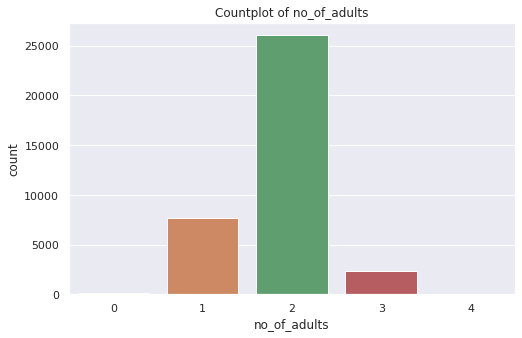

In [ ]:
count_fig(inn,'no_of_adults')

In [ ]:
inn['no_of_adults'].value_counts(normalize=True)

2    0.720448
1    0.211262
3    0.064001
0    0.003846
4    0.000443
Name: no_of_adults, dtype: float64

The vast majority of bookings include 2 adults. The percentages of each class have changed only slighly.

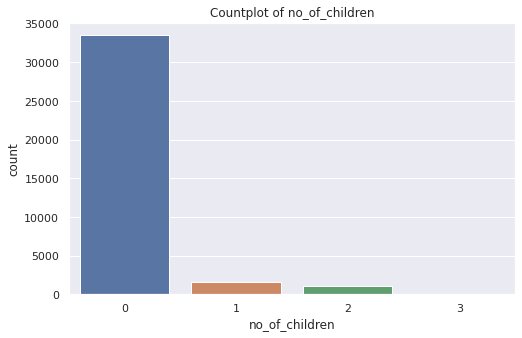

In [ ]:
count_fig(inn,'no_of_children')

In [ ]:
inn['no_of_children'].value_counts(normalize=True)

0    0.925595
1    0.044660
2    0.029220
3    0.000526
Name: no_of_children, dtype: float64

With outliers removed, we still see that the data is dominated by 0.

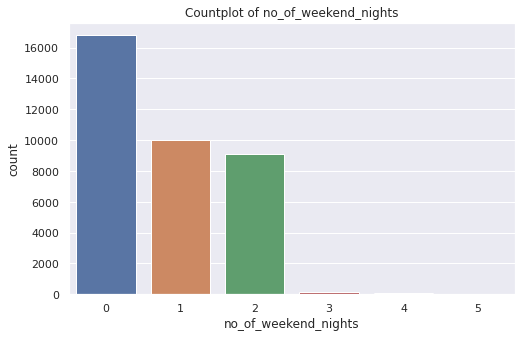

In [ ]:
count_fig(inn,'no_of_weekend_nights')

In [ ]:
inn['no_of_weekend_nights'].value_counts()

0    16792
1     9995
2     9069
3      153
4      113
5       18
Name: no_of_weekend_nights, dtype: int64

The 6 and 7 night outliers have been removed.

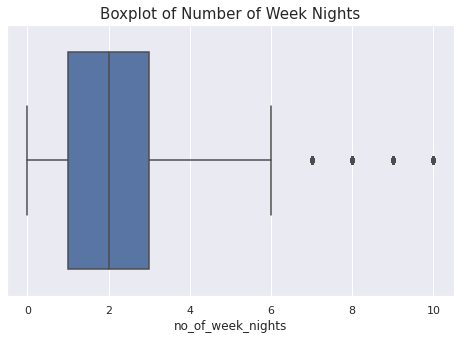

In [ ]:
plott('Boxplot of Number of Week Nights')
sns.boxplot(data=inn,x='no_of_week_nights');

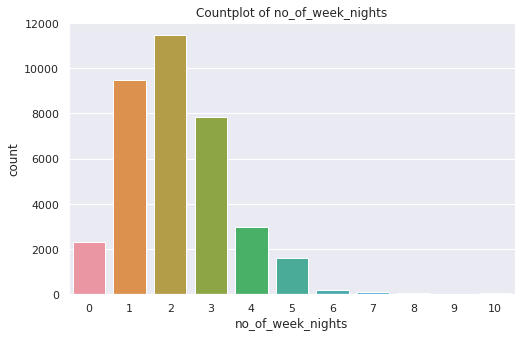

In [ ]:
count_fig(inn,'no_of_week_nights')

Here again, our data is more concentrated now that the outliers (more than 10 nights) have been removed.

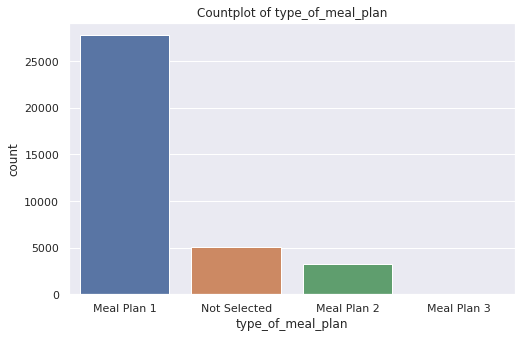

In [ ]:
count_fig(inn,'type_of_meal_plan',sort='value_counts')

Meal plan 1 (just breakfast) is the most common type. Very few guests choose full board (plan 3), and many select no meal plan. There is no perceptable difference after data processing.

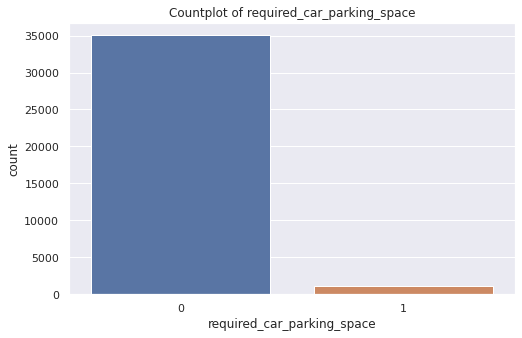

In [ ]:
count_fig(inn,'required_car_parking_space')

Few guests require parking accomodations. There is no real change to the ratio after data processing.

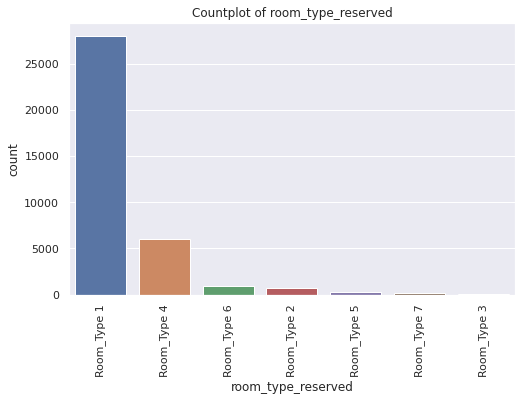

In [ ]:
count_fig(inn,'room_type_reserved',sort='value_counts',rotate=True)

In [ ]:
inn['room_type_reserved'].value_counts()

Room_Type 1    28023
Room_Type 4     6036
Room_Type 6      964
Room_Type 2      689
Room_Type 5      264
Room_Type 7      157
Room_Type 3        7
Name: room_type_reserved, dtype: int64

The value counts change only slightly, not enough to affect the ratio of types.

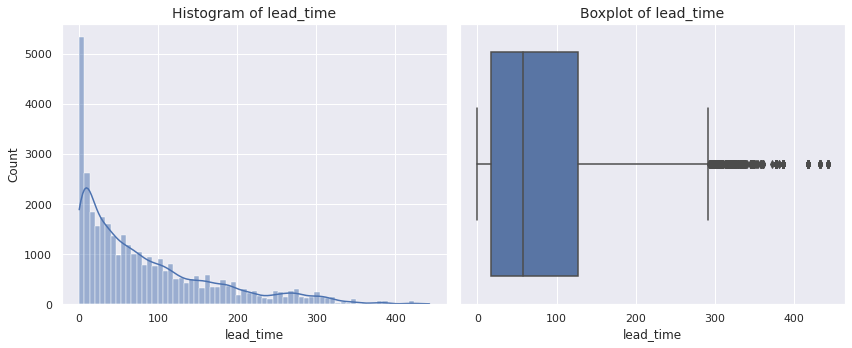

In [ ]:
hist_box(inn,'lead_time',kde=True)

Lead time looks unchanged.

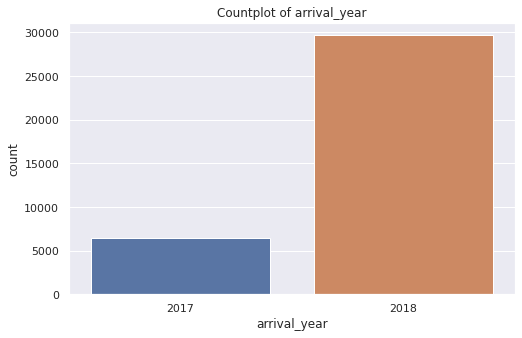

In [ ]:
count_fig(inn,'arrival_year')

There is no change in the ratio of arrival years after data processing.

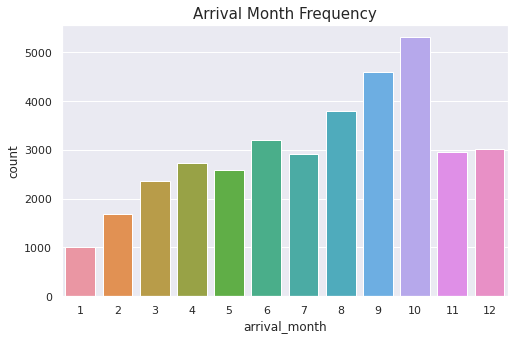

In [ ]:
plott('Arrival Month Frequency')
sns.countplot(data=inn,x='arrival_month');

Fall reservations (August, September, October) are most common, while winter (November, December, January, February) sees a steep decline. This mirrors the trend observed before data processing.

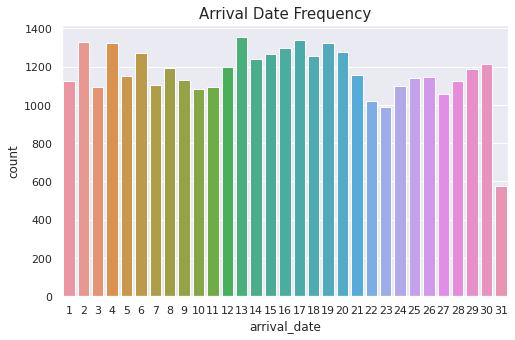

In [ ]:
plott('Arrival Date Frequency')
sns.countplot(data=inn,x='arrival_date');

The trend in arrival date has not changed with data processing.

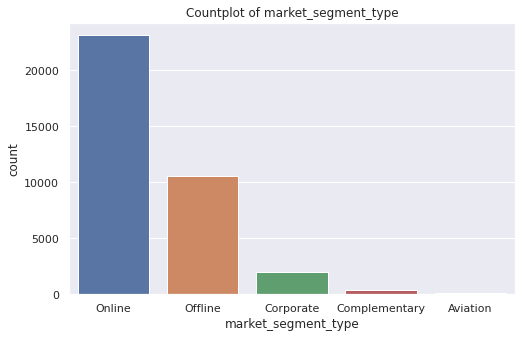

In [ ]:
count_fig(inn,'market_segment_type',sort='value_counts')

Market segment trends were not affected by data processing.

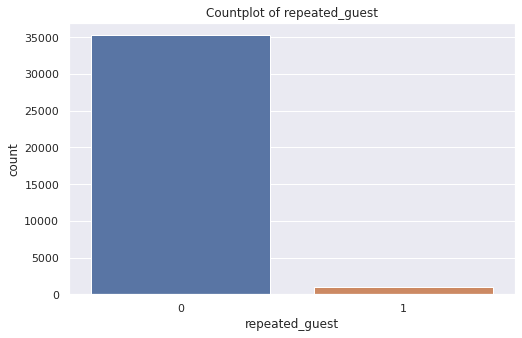

In [ ]:
count_fig(inn,'repeated_guest')

Our records continue to reflect that most guests are staying with INN Hotels for the first time.

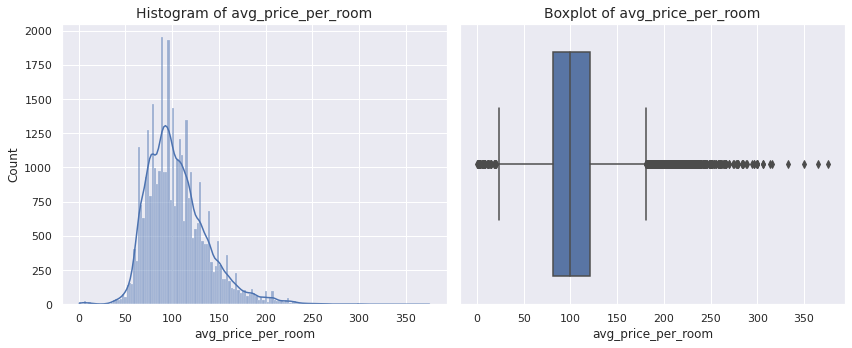

In [ ]:
hist_box(inn,'avg_price_per_room',kde=True)

Price data represents the biggest change after processing. The outlier on the high end was removed and all the 0€ records were imputed. With this, the average price looks more like a right-skewed smooth distribution.

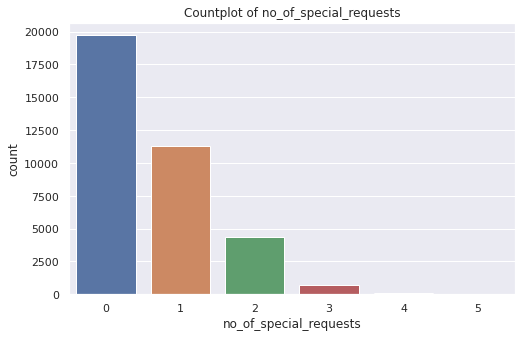

In [ ]:
count_fig(inn,'no_of_special_requests')

There was little change to the ratio of special requests.

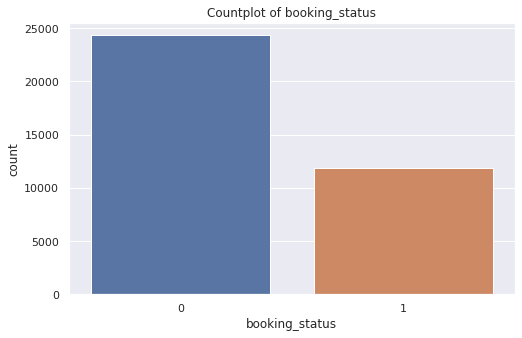

In [ ]:
count_fig(inn,'booking_status')

In [ ]:
inn['booking_status'].value_counts(normalize=True)

0    0.672413
1    0.327587
Name: booking_status, dtype: float64

The ratio of cancelled to not cancelled is essentially unchanged when compared with the data before processing.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
def vif_table(data):
  vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],
                index=data.columns).sort_values(ascending=False)
  print('Variance Inflation Factors')
  print(vif)

In [ ]:
vif_table(X)

Variance Inflation Factors
const                                   334.427435
market_segment_type_Online               69.759597
market_segment_type_Offline              62.921443
market_segment_type_Corporate            16.655652
market_segment_type_Complementary         4.147630
room_type_reserved_Room_Type 6            2.091295
no_of_children                            2.081999
avg_price_per_room                        2.022701
repeated_guest_1                          1.765490
no_of_previous_bookings_not_canceled      1.614402
arrival_year_2018                         1.428483
lead_time                                 1.398043
room_type_reserved_Room_Type 4            1.374630
no_of_previous_cancellations              1.352527
no_of_adults                              1.338646
type_of_meal_plan_Meal Plan 2             1.286956
type_of_meal_plan_Not Selected            1.283798
arrival_month                             1.279545
no_of_special_requests                    1.251373
room

The VIF is low (<5) for all numerical variables. The market segment types are the only columns with high multicollinearity. We can try removing the top one.

In [ ]:
vif_table(X.drop('market_segment_type_Online',axis=1))

Variance Inflation Factors
const                                   50.550530
room_type_reserved_Room_Type 6           2.090824
no_of_children                           2.081111
avg_price_per_room                       2.021497
repeated_guest_1                         1.761407
market_segment_type_Offline              1.636455
no_of_previous_bookings_not_canceled     1.613974
market_segment_type_Corporate            1.541698
arrival_year_2018                        1.425833
lead_time                                1.393364
room_type_reserved_Room_Type 4           1.369388
no_of_previous_cancellations             1.352396
no_of_adults                             1.321935
type_of_meal_plan_Meal Plan 2            1.286508
type_of_meal_plan_Not Selected           1.281786
arrival_month                            1.278497
no_of_special_requests                   1.246486
room_type_reserved_Room_Type 7           1.147500
market_segment_type_Complementary        1.129847
room_type_reserved_Room

As the rest of the high VIF scores disappeared, we can conclude that ```market_segment_type_Online``` has high multicollinearity with the others. We will actually remove the entire ```market_segment_type``` feature. This is for two reasons:
1. Removing only part of a categorical variable disrupts interpretability of the model.
2. After trying to build the model with just ```market_segment_type_Online``` removed, the optimizer was still running up against convergence issues. Removing all ```market_segment_type``` columns remedied the convergence issue.

In [ ]:
# collect market segment columns and drop
market=[col for col in X if col.startswith('market')]
X_train.drop(market,axis=1,inplace=True)

# drop columns for test data too
X_test.drop(market,axis=1,inplace=True)

## Building a Logistic Regression model

In [ ]:
lg1=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.454492
         Iterations 12


In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25298
Model:                          Logit   Df Residuals:                    25274
Method:                           MLE   Df Model:                           23
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2814
Time:                        04:57:15   Log-Likelihood:                -11498.
converged:                       True   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.5919      0.115    -39.921      0.000      -4.817      -4.366
no_of_adults                             0.1731      

Even though there are higher p-values, we will drop ```no_of_previous_bookings_not_canceled```. This is because the other columns are *parts* of categorical variables, and I do not want to remove only part of a categorical feature.

In [ ]:
X_train.drop('no_of_previous_bookings_not_canceled',axis=1,inplace=True)

In [ ]:
lg2=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.454624
         Iterations 9


In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25298
Model:                          Logit   Df Residuals:                    25275
Method:                           MLE   Df Model:                           22
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2812
Time:                        04:57:15   Log-Likelihood:                -11501.
converged:                       True   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.5961      0.115    -39.950      0.000      -4.822      -4.371
no_of_adults                       0.1741      0.035      4.917      0.

There are no other columns that I am comfortable dropping, as the remaining columns with high p-values are all part of categorical features.

## Model performance evaluation

In [ ]:
# heatmap function

def confusion_heatmap(actual,predicted,show_scores=False):
  '''Heatmap of confusion matrix comparing 
  actual values with predicted values.'''

  # generate confusion matrix
  cm=metrics.confusion_matrix(actual,predicted)
  cm=np.flip(cm).T

  # heatmap labels
  labels=['TP','FP','FN','TN']
  cm_labels=np.array(cm).flatten()
  cm_percents=np.round((cm_labels/np.sum(cm))*100,3)
  annot_labels=[]
  for i in range(4):
    annot_labels.append(str(labels[i])+'\nCount:'+str(cm_labels[i])+'\n'+str(cm_percents[i])+'%')
  annot_labels=np.array(annot_labels).reshape(2,2)

  # print figure
  plt.figure(figsize=(8,5))
  plt.title('Confusion Matrix',fontsize=20)
  sns.heatmap(data=cm,
              annot=annot_labels,
              annot_kws={'fontsize':'x-large'},
              xticklabels=[1,0],
              yticklabels=[1,0],
              cmap='Greens',
              fmt='s')
  plt.xlabel('Actual',fontsize=14)
  plt.ylabel('Predicted',fontsize=14)
  plt.tight_layout();

  # scores
  if show_scores==True:
    scores=['Accuracy','Precision','Recall','F1']
    score_list=[metrics.accuracy_score(actual,predicted),
                metrics.precision_score(actual,predicted),
                metrics.recall_score(actual,predicted),
                metrics.f1_score(actual,predicted)]
    df=pd.DataFrame(index=scores)
    df['Scores']=score_list
    return df
  return

### Initial Logistic Regression

,Scores
Accuracy,0.787730
Precision,0.722570
Recall,0.571377
F1,0.638140


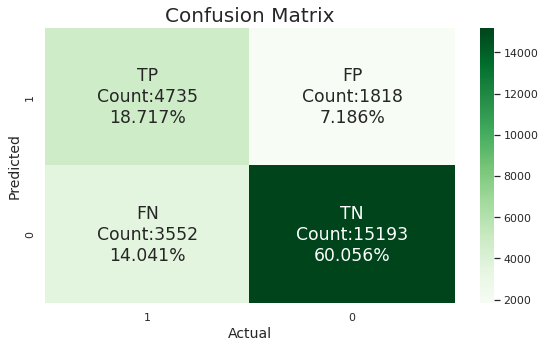

In [ ]:
# model performance with threshold of 0.5
predictions=np.round(lg2.predict(X_train)>0.5)

# plot heatmap with scores
confusion_heatmap(y_train,predictions,show_scores=True)

A false negative is more costly for INN Hotels than a false positive, since the former anticipates the guest keeping their booking when in fact they cancel. This wastes resources and takes up a room that could have been re-listed. A false positive, on the other hand, is a booking predicted to be cancelled that is not; in this case we still profit from their stay.

Measuring model performance with recall will cut down on false negatives, but we will monitor F1 as well so our model does not become overly imbalanced.

### Tuning Logistic Regression

We will compare recall scores and F1 scores for multiple thresholds. First we collect the scores in lists.

In [ ]:
# collect scores
recalls=[metrics.recall_score(y_train,np.round(lg2.predict(X_train)>n)) for n in np.linspace(0,1,51)]
f1s=[metrics.f1_score(y_train,np.round(lg2.predict(X_train)>n)) for n in np.linspace(0,1,51)]

Then we plot the scores.

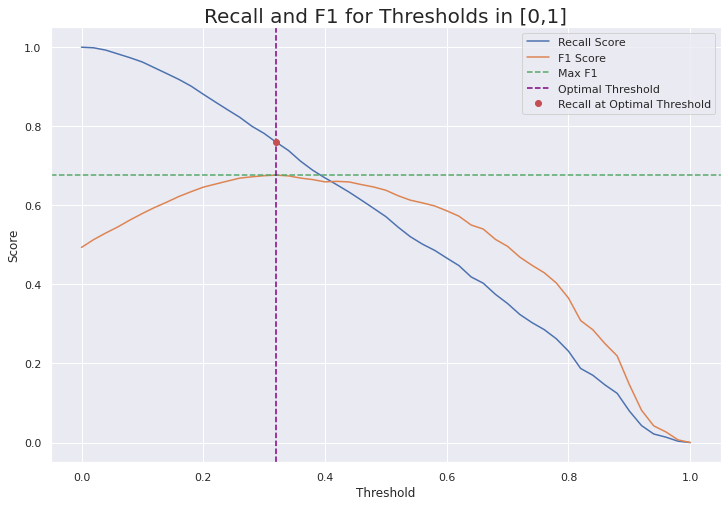

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Recall and F1 for Thresholds in [0,1]',fontsize=20)

# lineplots
sns.lineplot(x=np.linspace(0,1,51),y=recalls,label='Recall Score')
sns.lineplot(x=np.linspace(0,1,51),y=f1s,label='F1 Score')

# reference lines and point
plt.axhline(y=np.max(f1s),color='g',linestyle='--',label='Max F1')
plt.axvline(x=np.linspace(0,1,51)[np.argmax(f1s)],color='purple',linestyle='--',label='Optimal Threshold')
plt.plot(np.linspace(0,1,51)[np.argmax(f1s)],recalls[np.argmax(f1s)],'ro',label='Recall at Optimal Threshold')

# labels, etc.
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

The maximum F1 score is identified by the horizontal dashed (green) line. A vertical dashed (purple) line is plotted at the intersection of this tangent and the F1 curve. The associated recall score is marked by a (red) point at the intersection of the vertical dashed line and the recall curve.

In [ ]:
a=np.max(f1s)
b=np.linspace(0,1,51)[np.argmax(f1s)]
print('The highest F1 score is {} at threshold {}.'.format(np.round(a,3),b))

The highest F1 score is 0.676 at threshold 0.32.


In [ ]:
print('The recall at a threshold of 0.32 is {}.'.format(np.round(recalls[np.argmax(f1s)],3)))

The recall at a threshold of 0.32 is 0.76.


Since recall decreases essentially continuously, we can get a robust model by looking at the threshold associated to the max F1 score. This leaves us with high recall and optimal F1, ensuring we are also cutting down on false positives.

,Scores
Accuracy,0.761997
Precision,0.609766
Recall,0.759503
F1,0.676447


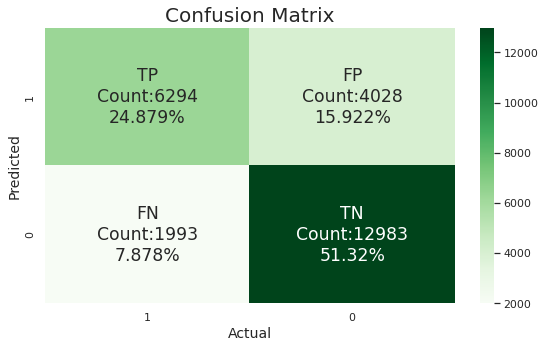

In [ ]:
# model performance with threshold of 0.32
predictions=np.round(lg2.predict(X_train)>0.32)

# plot heatmap with scores
confusion_heatmap(y_train,predictions,show_scores=True)

### Test Performance

In [ ]:
X_test.drop('no_of_previous_bookings_not_canceled',axis=1,inplace=True)

,Scores
Accuracy,0.767478
Precision,0.615402
Recall,0.773930
F1,0.685622


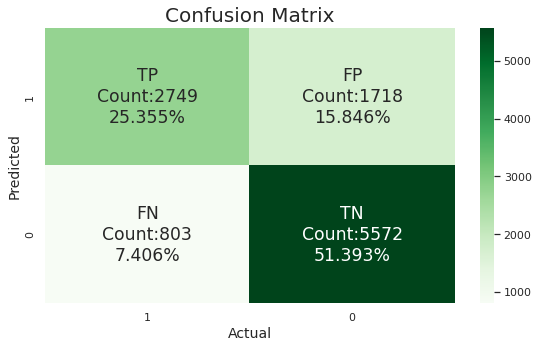

In [ ]:
# model performance on test data with threshold of 0.32
predictions=np.round(lg2.predict(X_test)>0.32)

# plot heatmap with scores
confusion_heatmap(y_test,predictions,show_scores=True)

Accuracy on training data and testing data is nearly the same: about 76%. Precision is similarly close, at around 61%. Recall is around the same on the testing data and the training, with 77% on testing and 76% on training. Lastly F1 scores are comparable: roughly 68% on both data sets.

Note that recall and F1 on the initial model were 57% and 64% respectively on training data, indicating that the alternate threshold choice improved performance, especially on recall.

## Final Model Summary

In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25298
Model:                          Logit   Df Residuals:                    25275
Method:                           MLE   Df Model:                           22
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2812
Time:                        04:57:22   Log-Likelihood:                -11501.
converged:                       True   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.5961      0.115    -39.950      0.000      -4.822      -4.371
no_of_adults                       0.1741      0.035      4.917      0.

The final model performs best with a threshold of 0.32. See below for a table including recall and F1 scores.

In [ ]:
models_scores=pd.DataFrame(columns=['Recall Score','F1 Score'])
models_scores.loc['Logit: Threshold=0.5']=(metrics.recall_score(y_test,np.round(lg2.predict(X_test)>0.5)),
                                           metrics.f1_score(y_test,np.round(lg2.predict(X_test)>0.5)))
models_scores.loc['Logit: Threshold=0.32']=(metrics.recall_score(y_test,np.round(lg2.predict(X_test)>0.32)),
                                           metrics.f1_score(y_test,np.round(lg2.predict(X_test)>0.32)))
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.58080,0.645393
Logit: Threshold=0.32,0.77393,0.685622


The table illustrates that the model performance was improved by adjusting the threshold value. The model is best at reducing false negatives, which are costly to INN Hotels.

## Building a Decision Tree model

We start by redefining our training and testing data. For our logistic regression, we removed several features to improve model performance. Since those same restrictions are not present in our decision tree model, we add those features (like market segment) back in.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X.drop('const',axis=1),
                                               y,
                                               test_size=0.3,
                                               random_state=2,
                                               stratify=y)

In [ ]:
# first tree
dTree1=tree.DecisionTreeClassifier(random_state=1)
dTree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

,Scores
Accuracy,0.994268
Precision,0.996342
Recall,0.986123
F1,0.991206


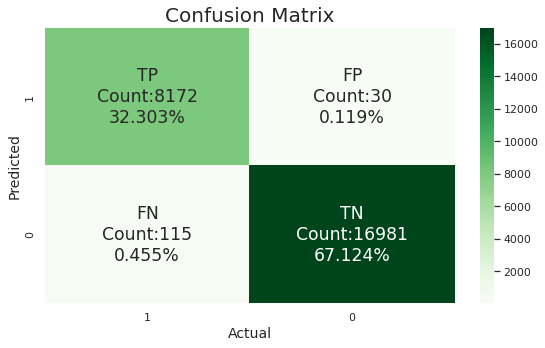

In [ ]:
confusion_heatmap(y_train,dTree1.predict(X_train),show_scores=True)

From the scores, we can be almost certain that this model suffers from overfitting on the training data. We can check with a simple function.

In [ ]:
def check_recall(model):
  train_recall=metrics.recall_score(y_train,model.predict(X_train))
  test_recall=metrics.recall_score(y_test,model.predict(X_test))
  print('Training Recall:',np.round(train_recall,3))
  print('Testing Recall:',np.round(test_recall,3))
  return

def get_scores(model):
  return(metrics.recall_score(y_test,model.predict(X_test)),
         metrics.f1_score(y_test,model.predict(X_test)))

In [ ]:
check_recall(dTree1)

Training Recall: 0.986
Testing Recall: 0.809


Indeed, the recall on testing data is nearly 20 points lower than on training data. While 80% recall is still good performance, a model with such a gap between training and testing performance is not sufficiently generalized.

Remember that we will measure model performance based on recall, as false negatives are most costly for INN Hotels.

,Scores
Accuracy,0.868290
Precision,0.793370
Recall,0.808559
F1,0.800892


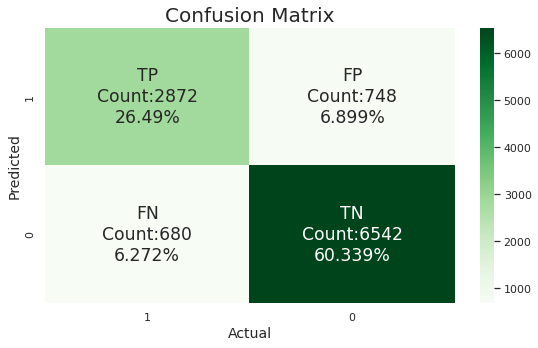

In [ ]:
confusion_heatmap(y_test,dTree1.predict(X_test),show_scores=True)

F1 score is similarly lower on the testing data when compared to the training set. We will add this tree's performance to our scores table for reference.

In [ ]:
models_scores.loc['Original Tree']=get_scores(dTree1)
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.580800,0.645393
Logit: Threshold=0.32,0.773930,0.685622
Original Tree,0.808559,0.800892


## Do we need to prune the tree?

We have already detected some overfitting on our tree. Let's visualize it now to determine its complexity.

In [ ]:
X_cols=X.drop('const',axis=1).columns.tolist()

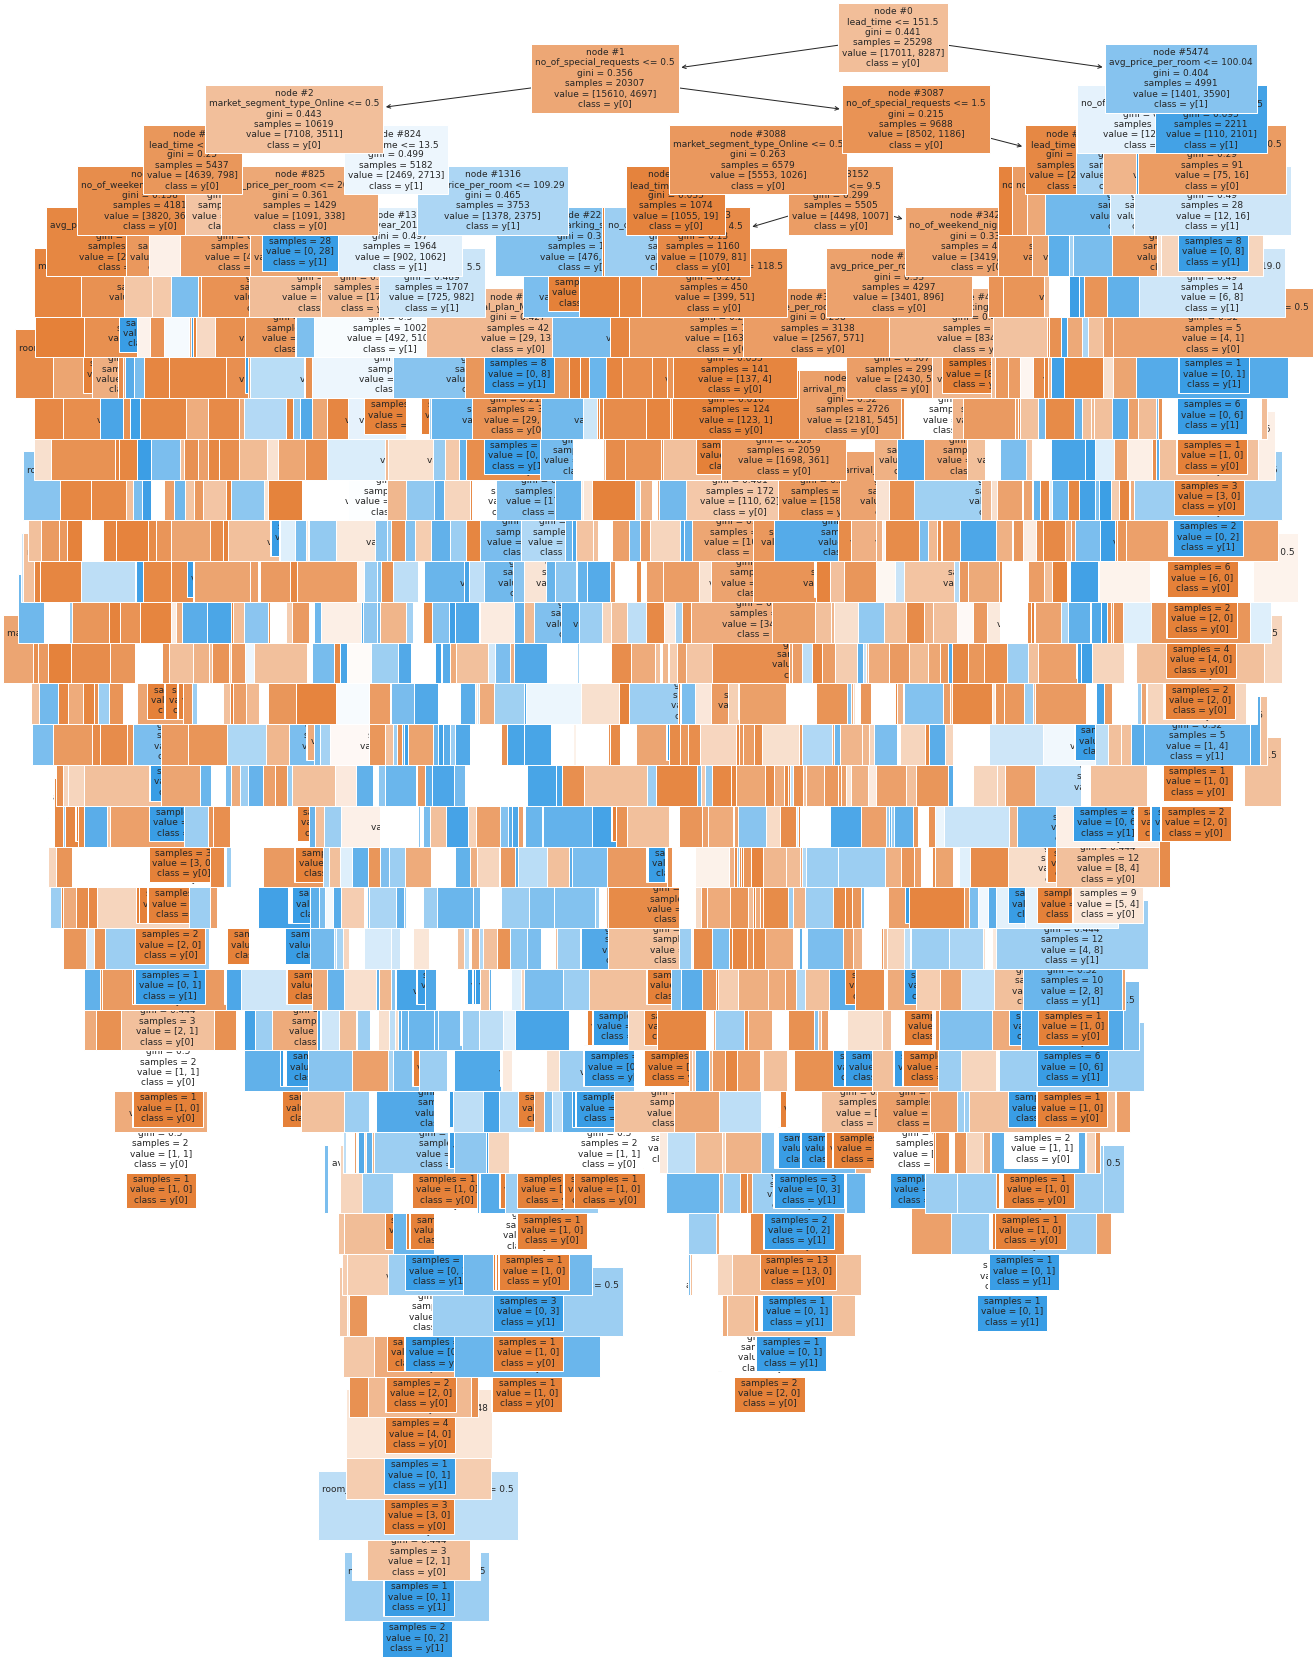

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(decision_tree=dTree1,
               feature_names=X_cols,
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

It is now abundantly clear that this tree is overgrown. We must simplify!

In [ ]:
print(tree.export_text(decision_tree=dTree1,
                       feature_names=X_cols,
                       show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 216.24
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 162.53
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  162.53
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 177.96
|   |   |   |   |   |   |   |   |   |   |   |--- trun

The text version of the tree is slightly more readable, but still too unweildy.

In [ ]:
# list features by importance
imp=pd.Series(dTree1.feature_importances_,index=X_cols)
imp=imp.sort_values(ascending=False)
print('Feature importance')
print('='*10)
imp

Feature importance


lead_time                               0.356752
avg_price_per_room                      0.170967
market_segment_type_Online              0.082062
arrival_date                            0.081950
arrival_month                           0.072680
no_of_special_requests                  0.069091
no_of_week_nights                       0.046213
no_of_weekend_nights                    0.032091
no_of_adults                            0.030242
arrival_year_2018                       0.012772
market_segment_type_Offline             0.009025
required_car_parking_space_1            0.007083
room_type_reserved_Room_Type 4          0.007046
type_of_meal_plan_Not Selected          0.006857
no_of_children                          0.004823
type_of_meal_plan_Meal Plan 2           0.004020
room_type_reserved_Room_Type 5          0.002132
room_type_reserved_Room_Type 2          0.001344
room_type_reserved_Room_Type 6          0.001060
market_segment_type_Corporate           0.000667
no_of_previous_booki

We find that lead_time is the most important feature in this first tree, followed by room price. These two features will largely determine the booking status.

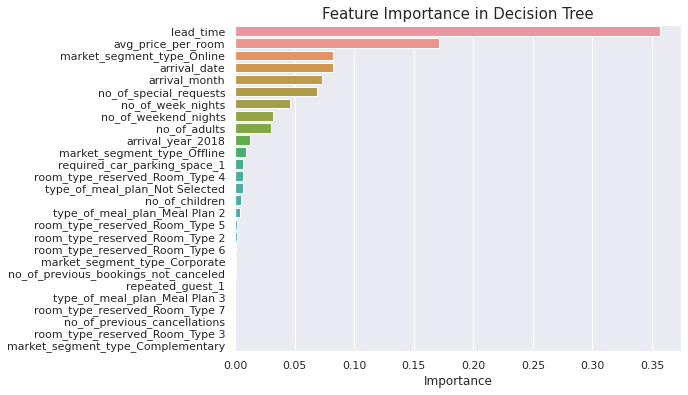

In [ ]:
# plot feature importance
plt.figure(figsize=(8,6))
plt.title('Feature Importance in Decision Tree',fontsize=15)
sns.barplot(x=imp,y=imp.index)
plt.xlabel('Importance');

### Pre-pruning: Limited depth

In [ ]:
# second tree
dTree2=tree.DecisionTreeClassifier(max_depth=4,random_state=1)
dTree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

We grow a new tree with maximum depth of 4, with the goal of getting decent performance out of a much simpler model.

In [ ]:
check_recall(dTree2)

Training Recall: 0.693
Testing Recall: 0.706


While recall has certainly dropped from the original tree's scores, the new model promises to be more generalized: There is almost no gap between training and testing recall.

,Scores
Accuracy,0.827654
Precision,0.759619
Recall,0.693254
F1,0.724921


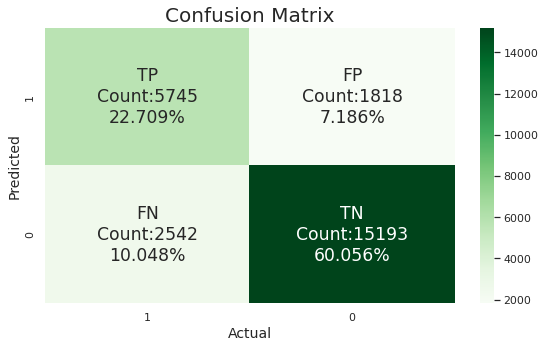

In [ ]:
confusion_heatmap(y_train,dTree2.predict(X_train),show_scores=True)

Accuracy on the new model is still 83%, not too bad considering how much simpler it is.

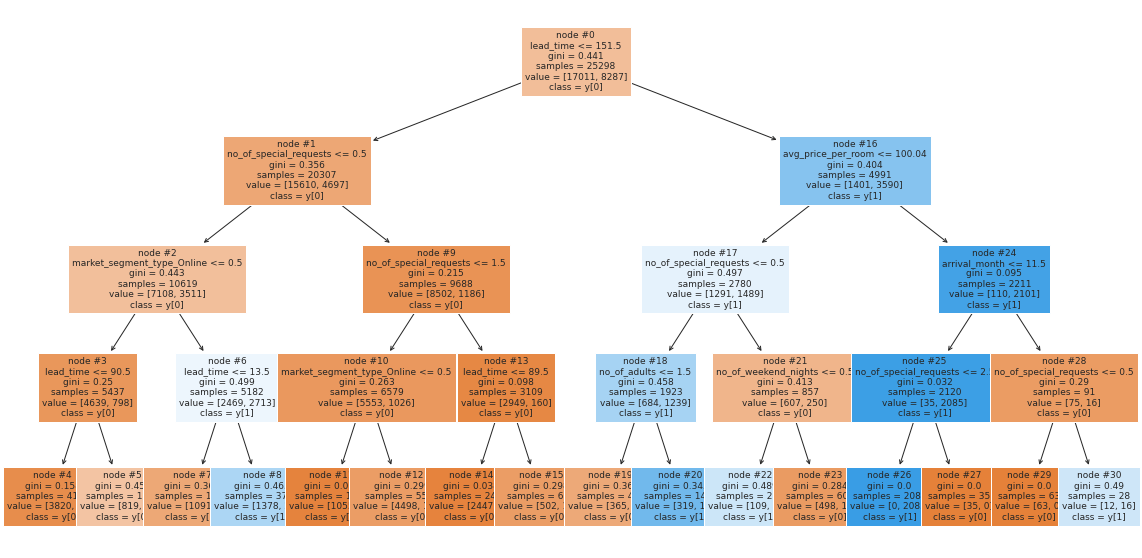

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=dTree2,
               feature_names=X_cols,
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

This model is easily comprehensible and still produces fairly good results.

In [ ]:
models_scores.loc['Depth=4 Tree']=get_scores(dTree2)
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.580800,0.645393
Logit: Threshold=0.32,0.773930,0.685622
Original Tree,0.808559,0.800892
Depth=4 Tree,0.706363,0.730528


While the original tree suffered from overfitting, our new model does not, and it already performs better than the best logistical regression model on F1 score. Let's see if we can push that performance further with a more targeted parameter search. Hopefully we can get a recall score that surpasses the logistical regression too.

### Pre-pruning: GridSearchCV

In [ ]:
# choose classifier (model type)
search=tree.DecisionTreeClassifier(random_state=1)

# parameters to choose from
params={'max_depth':np.arange(3,10),
        'min_samples_leaf':[16,32,64],
        'max_leaf_nodes':np.arange(20,50,5),
        'min_impurity_decrease':[0.001,0.01,0.1],
        'class_weight':[None,'balanced']}

After establishing parameters to check in our grid search, we perform the search with a cross validation size of 5.

In [ ]:
# grid search with cross validation (cv) of size 5
grid_obj=GridSearchCV(estimator=search,
                      param_grid=params,
                      scoring=['recall','f1'],
                      refit='recall',
                      cv=5,
                      verbose=1,
                      return_train_score=True)
# this is the part that takes a while
grid_obj.fit(X_train,y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([20, 25, 30, 35, 40, 45]),
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'min_samples_leaf': [16, 32, 64]},
             refit='recall', return_train_score=True, scoring=['recall', 'f1'],
             verbose=1)

In [ ]:
# best model
search=grid_obj.best_estimator_
search.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=40,
                       min_impurity_decrease=0.001, min_samples_leaf=16,
                       random_state=1)

The above parameters give the best result from the grid search. The best estimator was scored on recall.

In [ ]:
# grid search calculations
results=grid_obj.cv_results_

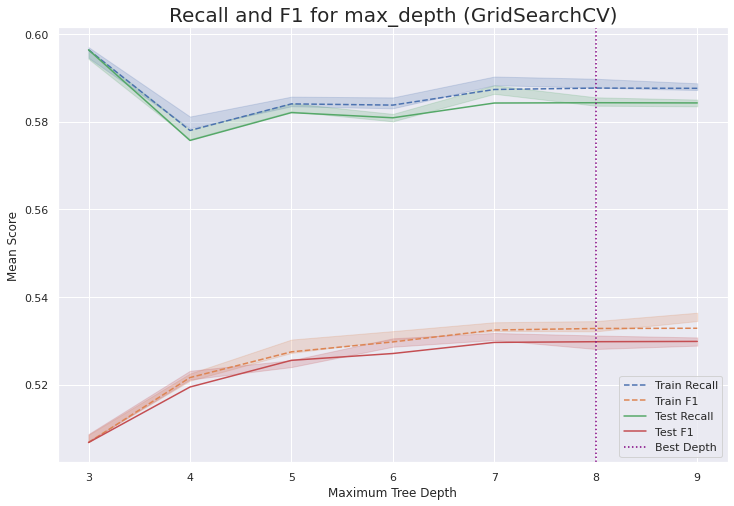

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Recall and F1 for max_depth (GridSearchCV)',fontsize=20)

# training scores
sns.lineplot(x=results['param_max_depth'],
             y=results['mean_train_recall'],
             ci=3,
             label='Train Recall',
             linestyle='--')
sns.lineplot(x=results['param_max_depth'],
             y=results['mean_train_f1'],
             ci=3,
             label='Train F1',
             linestyle='--')

# testing scores
sns.lineplot(x=results['param_max_depth'],
             y=results['mean_test_recall'],
             ci=3,
             label='Test Recall')
sns.lineplot(x=results['param_max_depth'],
             y=results['mean_test_f1'],
             ci=3,
             label='Test F1')

plt.axvline(x=8,color='purple',linestyle=':',label='Best Depth')

plt.xlabel('Maximum Tree Depth')
plt.ylabel('Mean Score')
plt.legend(loc='lower right')
plt.show()

To illustrate the process of grid search, we can plot the mean scores of the model over the values of max_depth. Recall had a consistently higher score than F1 across both training and testing data. The best estimator was scored on recall, and it found the optimal depth to be 8. Note that the shaded regions are confidence intervals.

,Scores
Accuracy,0.844968
Precision,0.756433
Recall,0.776879
F1,0.766520


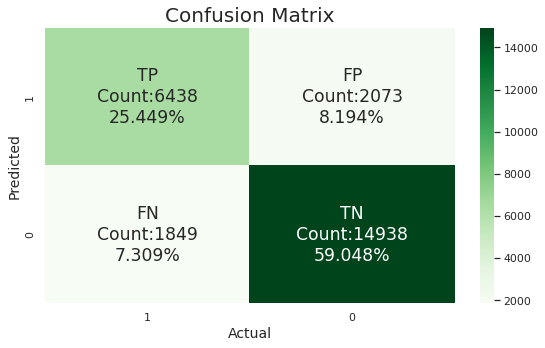

In [ ]:
confusion_heatmap(y_train,search.predict(X_train),show_scores=True)

Looking at the confusion matrix for the result of our grid search, we find our model is balanced. Accuracy is 84%, despite scoring the grid search for recall. Precision is about 76%, recall is around 78%, and F1 is roughly 77%.

In [ ]:
check_recall(search)

Training Recall: 0.777
Testing Recall: 0.781


It is promising that the scores for training data and testing data are so close. This indicates that our model is more generalized.

In [ ]:
models_scores.loc['GridSearchCV']=get_scores(search)
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.580800,0.645393
Logit: Threshold=0.32,0.773930,0.685622
Original Tree,0.808559,0.800892
Depth=4 Tree,0.706363,0.730528
GridSearchCV,0.780968,0.766298


We record recall and F1 scores in our table for comparison later.

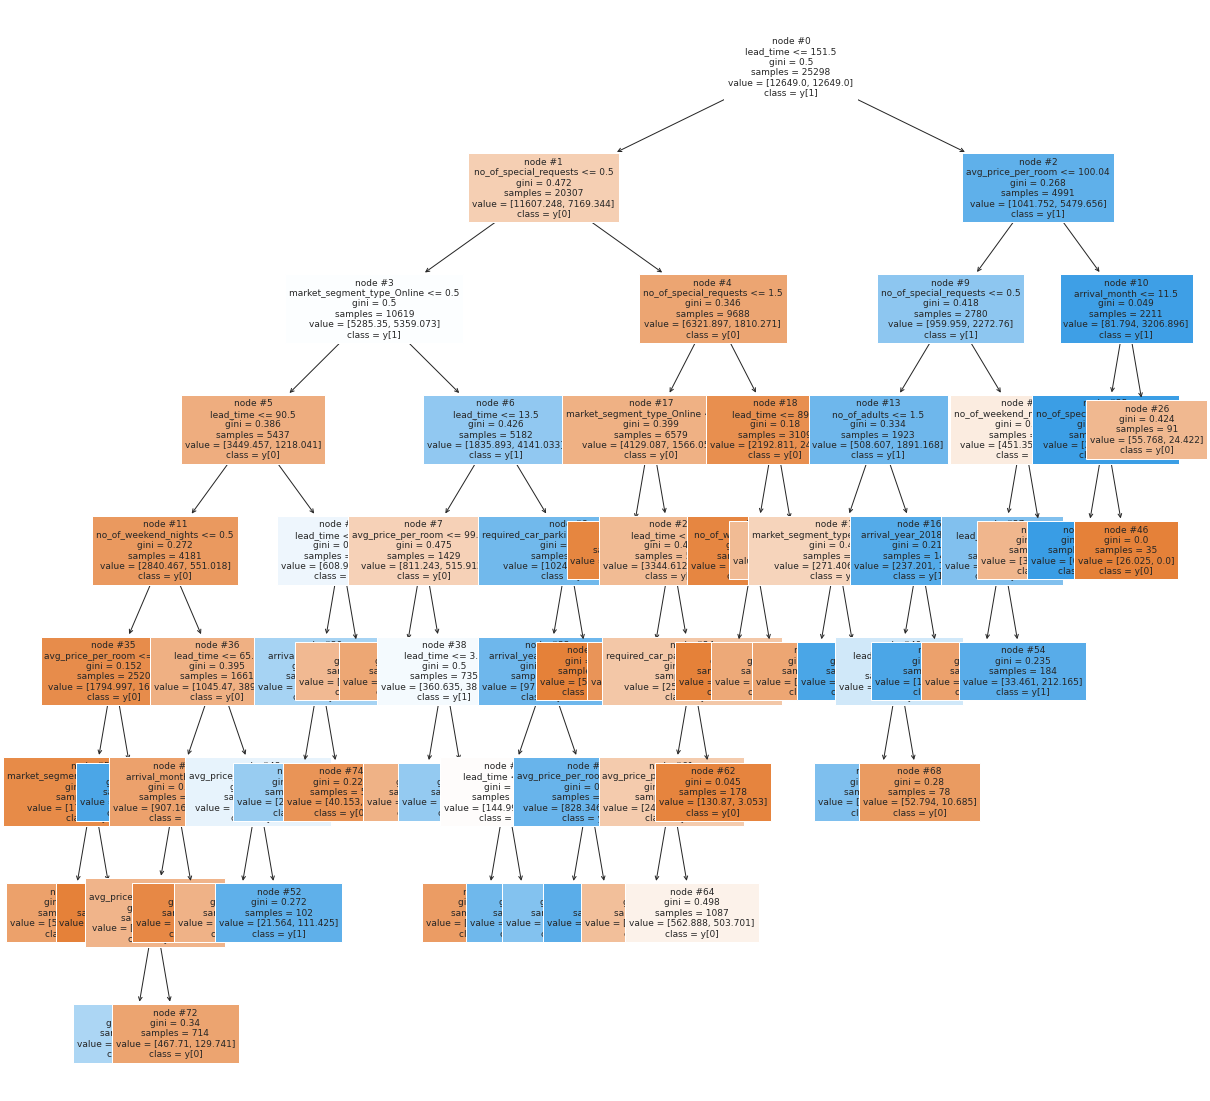

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree=search,
               feature_names=X_cols,
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

Visualizing our tree now proves more comprehensible. This tree is actually somewhat practical and interpretable. We could adjust the figure dimensions for better readability, but this is just to get an idea of the structure.

In [ ]:
# list features by importance
imp=pd.Series(search.feature_importances_,index=X_cols)
imp=imp.sort_values(ascending=False)
print('Feature importance')
print('='*10)
imp

Feature importance


lead_time                               0.474663
market_segment_type_Online              0.182827
no_of_special_requests                  0.159436
avg_price_per_room                      0.075212
no_of_adults                            0.026554
no_of_weekend_nights                    0.020778
arrival_month                           0.020161
arrival_year_2018                       0.015381
required_car_parking_space_1            0.014739
market_segment_type_Offline             0.005629
no_of_week_nights                       0.004621
room_type_reserved_Room_Type 7          0.000000
room_type_reserved_Room_Type 6          0.000000
market_segment_type_Corporate           0.000000
market_segment_type_Complementary       0.000000
room_type_reserved_Room_Type 4          0.000000
room_type_reserved_Room_Type 5          0.000000
type_of_meal_plan_Not Selected          0.000000
room_type_reserved_Room_Type 3          0.000000
room_type_reserved_Room_Type 2          0.000000
no_of_children      

As with the logistic regression, lead time is the most important feature. However unlike logistic regression, online bookings and special requirements contribute more than average price per room.

### Post-pruning: Cost Complexity

In [ ]:
# generate decision tree classifier
ccTree=tree.DecisionTreeClassifier(random_state=1)

# find the cost complexity pruning path
path=ccTree.cost_complexity_pruning_path(X_train,y_train)

We start by defining the cost complexity pruning path for a decision tree with the training data.

In [ ]:
# generate a list of trees along the pruning path
ccTrees=[]
for alp in path.ccp_alphas:
  aTree=tree.DecisionTreeClassifier(ccp_alpha=alp,random_state=1)
  aTree.fit(X_train,y_train)
  ccTrees.append(aTree)

Now we grow trees along the pruning path. We collect these trees in a list.

In [ ]:
# verify that the last tree has been pruned to the root node.
print('Number of nodes in last tree:',ccTrees[-1].tree_.node_count)

Number of nodes in last tree: 1


The final entry in this list is the trivial tree, i.e., a tree consisting of just the root node.

In [ ]:
# remove last tree
ccTrees=ccTrees[:-1]
alps=path.ccp_alphas[:-1]

We can cut out the last tree, since it's trivial.

#### Maximum Recall

In [ ]:
# recall scores along the path
train_recall=[metrics.recall_score(y_train,aTree.predict(X_train)) for aTree in ccTrees]
test_recall=[metrics.recall_score(y_test,aTree.predict(X_test)) for aTree in ccTrees]

We start by collecting the recall scores for trees along the path.

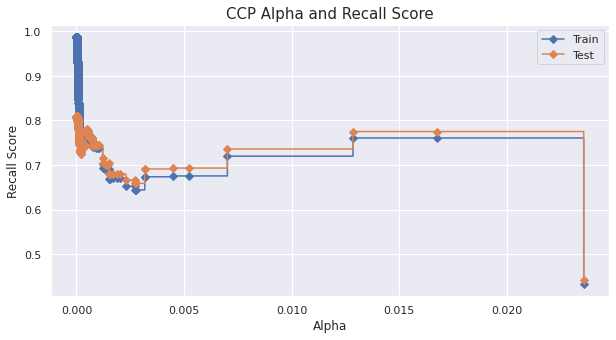

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title('CCP Alpha and Recall Score',fontsize=15)
ax.plot(alps,train_recall,marker='D',label='Train',drawstyle='steps-post')
ax.plot(alps,test_recall,marker='D',label='Test',drawstyle='steps-post')
ax.set_xlabel('Alpha')
ax.set_ylabel('Recall Score')
ax.legend()
plt.show()

Plotting ccp_alpha versus recall score, we get a good idea of how performance changes as complexity decreases.

In [ ]:
# finding model with best recall score
best_idx_recall=np.argmax(test_recall)
best_recall_model=ccTrees[best_idx_recall]

,Scores
Accuracy,0.868474
Precision,0.792837
Recall,0.810248
F1,0.801448


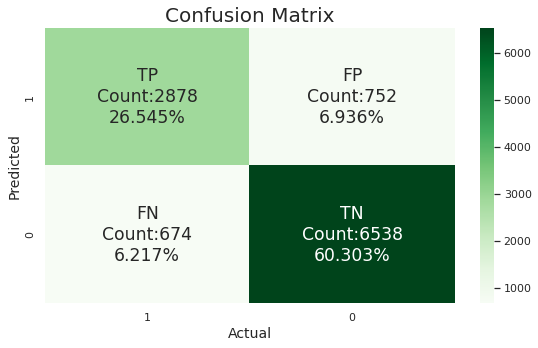

In [ ]:
confusion_heatmap(y_test,best_recall_model.predict(X_test),show_scores=True)

The model with the best recall along the path can be studied above. Both false negative and false positives are low. Accuracy on testing data is nearly 87%, and both recall and F1 are over 80%. While at first glance this looks fantastic, there is a caveat.

In [ ]:
a=best_recall_model.tree_.node_count
print('There are {} nodes in the ccp optimization for recall score.'.format(a))

There are 5549 nodes in the ccp optimization for recall score.


There are 5549 nodes in the ccp optimization for recall score! This means that the tree was barely pruned. We can see it lacks generality below.

In [ ]:
check_recall(best_recall_model)

Training Recall: 0.986
Testing Recall: 0.81


With such a disparity between training recall and testing recall, there is no way this tree is sufficiently general.

To remedy this, we will set a cutoff of 0.002 and only consider values of alpha greater than this. This value was determined visually by studying the plot above.

In [ ]:
# generate recall scores with alpha cutoff
test_recall_cut=[]
for idx,val in enumerate(test_recall):
  if alps[idx]>0.002:
    test_recall_cut.append(val)
  else:
    test_recall_cut.append(0)
best_recall_with_cut=np.max(test_recall_cut)

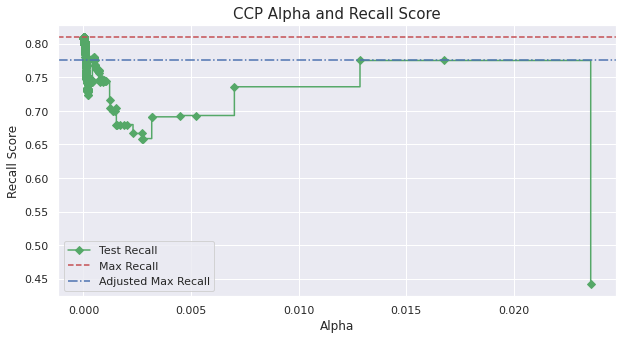

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title('CCP Alpha and Recall Score',fontsize=15)
ax.plot(alps,test_recall,marker='D',label='Test Recall',drawstyle='steps-post',color='g')
plt.axhline(y=np.max(test_recall),color='r',linestyle='--',label='Max Recall')
plt.axhline(y=best_recall_with_cut,color='b',linestyle='-.',label='Adjusted Max Recall')
ax.set_xlabel('Alpha')
ax.set_ylabel('Recall Score')
ax.legend()
plt.show()

The dashed red line shows the overall max recall score on testing data. This score corresponds to the overly complex model just found. The lower dashed blue line shows the adjusted max recall, after taking into account the alpha cutoff.

In [ ]:
a=np.max(test_recall)-np.max(test_recall_cut)
print('The difference in recall scores is',np.round(a,3))

The difference in recall scores is 0.035


The drop in recall is small, and the resulting model is far less complex.

In [ ]:
# best model for recall after cutoff
adj_best_recall_model=ccTrees[np.argmax(test_recall_cut)]

,Scores
Accuracy,0.776241
Precision,0.628539
Recall,0.775056
F1,0.694150


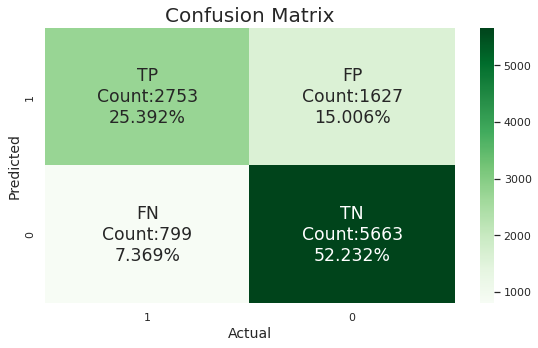

In [ ]:
confusion_heatmap(y_test,adj_best_recall_model.predict(X_test),show_scores=True)

In [ ]:
adj_best_recall_model.tree_.node_count

9

This adjusted model still performs well, but only has 9 nodes (instead of 5549).

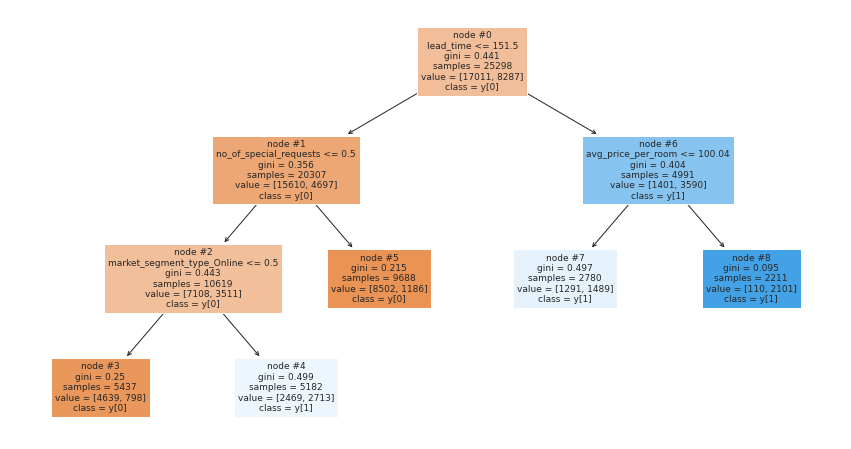

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(decision_tree=adj_best_recall_model,
               feature_names=X_cols,
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

This is our simplest model yet, and its performance still stands up to the others.

In [ ]:
models_scores.loc['ccp quasi-optimal recall']=get_scores(adj_best_recall_model)
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.580800,0.645393
Logit: Threshold=0.32,0.773930,0.685622
Original Tree,0.808559,0.800892
Depth=4 Tree,0.706363,0.730528
GridSearchCV,0.780968,0.766298
ccp quasi-optimal recall,0.775056,0.694150


#### Maximum F1

In [ ]:
# f1 scores along the path
train_f1=[metrics.f1_score(y_train,aTree.predict(X_train)) for aTree in ccTrees]
test_f1=[metrics.f1_score(y_test,aTree.predict(X_test)) for aTree in ccTrees]

We start by collecting the F1 scores for trees along the path.

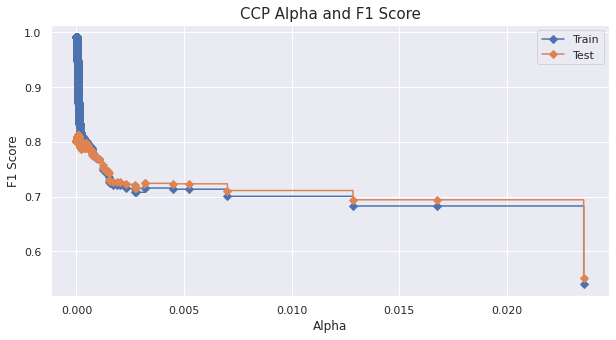

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title('CCP Alpha and F1 Score',fontsize=15)
ax.plot(alps,train_f1,marker='D',label='Train',drawstyle='steps-post')
ax.plot(alps,test_f1,marker='D',label='Test',drawstyle='steps-post')
ax.set_xlabel('Alpha')
ax.set_ylabel('F1 Score')
ax.legend()
plt.show()

Examining F1 scores along the path, we find the same promblem as before: The maximum F1 score is achieved at especially small alpha, indicating an overly-complex model.

We can use a similar cutoff approch as before so long as the data is not continuously decreasing. To ascertain whether this condition is met, we look at the differences in consecutive scores. A potive difference indicates an increase in F1 score as alpha increases. Choosing a cutoff somewhere between low alphas (overly-complex models) and a spike above the horizontal line at 0 will set us up to isolate a local maximum.

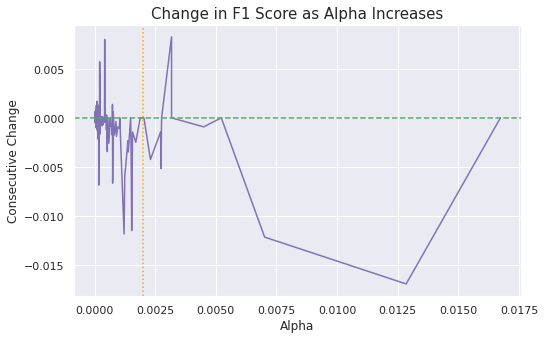

In [ ]:
# list of consecutive score differences
a=[]
for idx in range(len(test_f1)-2):
  a.append(test_f1[idx+1]-test_f1[idx])

# plot deltas
plott('Change in F1 Score as Alpha Increases')
sns.lineplot(x=alps[1:-1],y=a,color='m')
plt.axhline(y=0,linestyle='--',color='g')
plt.axvline(x=0.002,linestyle=':',color='orange')
plt.xlabel('Alpha')
plt.ylabel('Consecutive Change');

A sensible cutoff for alpha is 0.002, indicated above by the vertical dotted line. We will find the model with the max F1 score and alpha greater than 0.002.

In [ ]:
# generate f1 scores with alpha cutoff
test_f1_cut=[]
for idx,val in enumerate(test_f1):
  if alps[idx]>0.002:
    test_f1_cut.append(val)
  else:
    test_f1_cut.append(0)

In [ ]:
# best model for f1 after cutoff
adj_best_f1_model=ccTrees[np.argmax(test_f1_cut)]

,Scores
Accuracy,0.832595
Precision,0.780977
Recall,0.679617
F1,0.726780


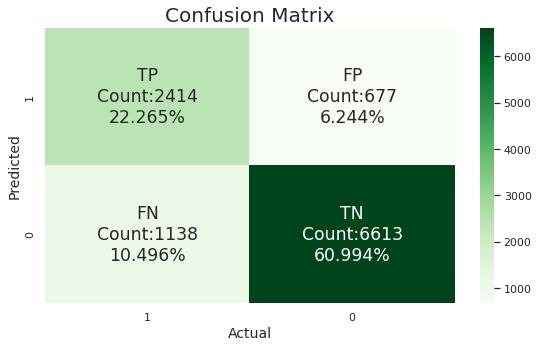

In [ ]:
confusion_heatmap(y_test,adj_best_f1_model.predict(X_test),show_scores=True)

In [ ]:
adj_best_f1_model.tree_.node_count

31

This model performs well on accuracy and F1, but the recall suffers slightly compared to other decision trees. It is still simple, with only 31 nodes.

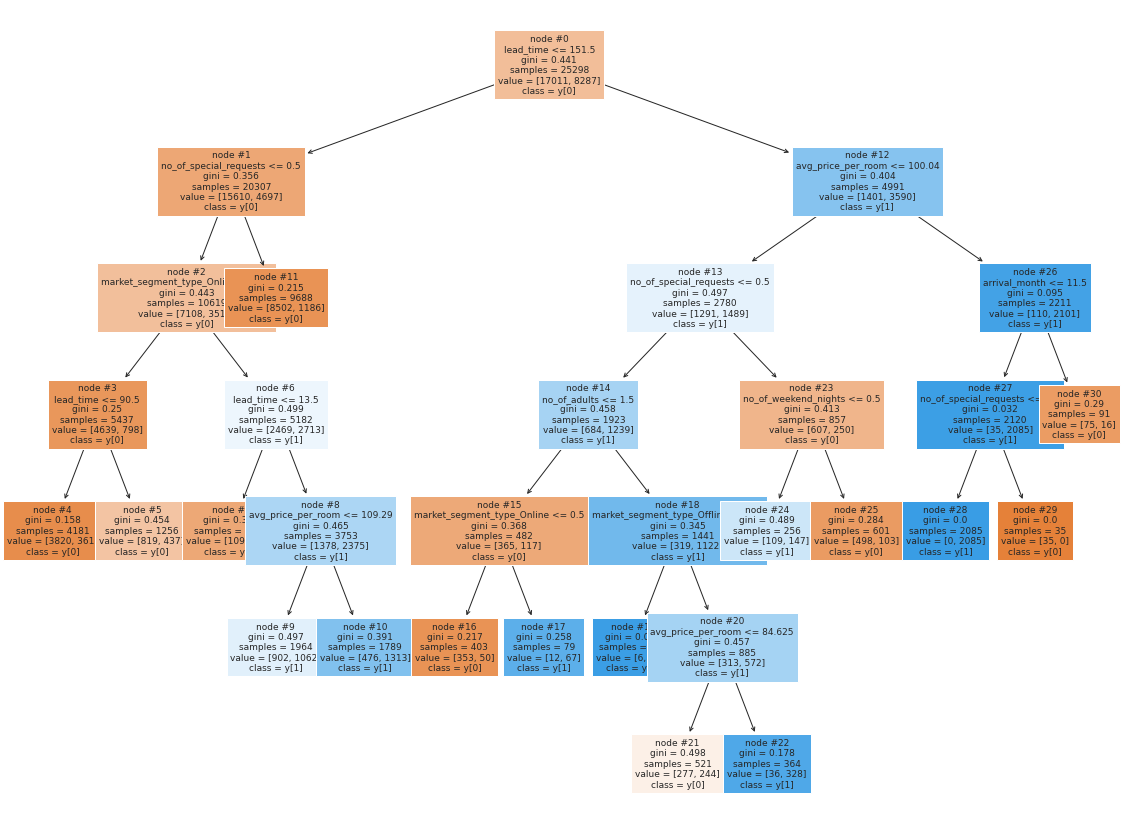

In [ ]:
plt.figure(figsize=(20,15))
tree.plot_tree(decision_tree=adj_best_f1_model,
               feature_names=X_cols,
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

The simplicity of this model can be observed in the plot above.

In [ ]:
# add this model to the comparison table
models_scores.loc['ccp quasi-optimal f1']=get_scores(adj_best_f1_model)

## Model Performance Comparison and Conclusions

We can compare models by looking at their performance on recall and F1.

In [ ]:
models_scores

,Recall Score,F1 Score
Logit: Threshold=0.5,0.580800,0.645393
Logit: Threshold=0.32,0.773930,0.685622
Original Tree,0.808559,0.800892
Depth=4 Tree,0.706363,0.730528
GridSearchCV,0.780968,0.766298
ccp quasi-optimal recall,0.775056,0.694150
ccp quasi-optimal f1,0.679617,0.726780


For logistic regression to perform comparably to decision tree, we had to find the optimal threshold. There is not much more performance to be gained on logistic regression models. With a recall of 77%, the optimal logistic regression model is reliable while remaining balanced.

While logistic regression had relatively few ways to improve performance, decision tree models offered many avenues for gains. The original tree performed well but suffered from severe over-fitting.

As a first approximation at pre-pruning, we limited the depth to just 4, which produced impressive performance for its simplicity. More sophisticated was the grid search with cross validation, which identified a combination of parameters to grow a tree optimized for recall.

For post-pruning, we looked to pare back trees for optimal recall and F1. Both cost complexity pruning paths achieved maxima at very low values of alpha, causing the resulting models to be overly complex. We introduced complexity cutoffs to find an almost-optimal model that scored highly while being sufficiently generalized. The tradeoff, however, was an imbalance: Both quasi-optimal ccp models scored appreciably worse on the metric they weren't built for. Put another way, the quasi-optimal recall model scored worse on F1, and the quasi-optimal F1 model scored worse on recall.

The best model was the decision tree resulting from the grid search.

In [ ]:
# best decision tree parameters
grid_obj.best_params_

{'class_weight': 'balanced',
 'max_depth': 8,
 'max_leaf_nodes': 40,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 16}

,Scores
Accuracy,0.843940
Precision,0.752169
Recall,0.780968
F1,0.766298


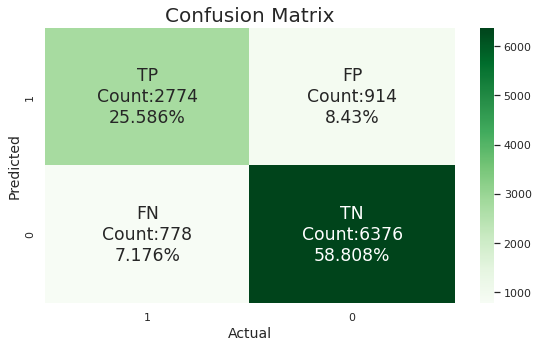

In [ ]:
confusion_heatmap(y_test,search.predict(X_test),show_scores=True)

This model has one of the highest recall scores (78%) on test data, only surpassed by the overfit original tree. It is exceptionally balanced, with an F1 score of 77%. Accuracy is 84%, and precision is 75%. Only 7% of the data is incorrectly categorized as false negatives, meaning INN Hotels can be confident this model will not suffer many costly errors.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

In [ ]:
# list features by importance
imp=pd.Series(search.feature_importances_,index=X_cols)
imp=imp.sort_values(ascending=False)
print('Top Five Features sorted by Importance')
print('='*10)
imp[:5]

Top Five Features sorted by Importance


lead_time                     0.474663
market_segment_type_Online    0.182827
no_of_special_requests        0.159436
avg_price_per_room            0.075212
no_of_adults                  0.026554
dtype: float64

We can guide our recommendations with the most important features from our GridSearchCV decision tree.

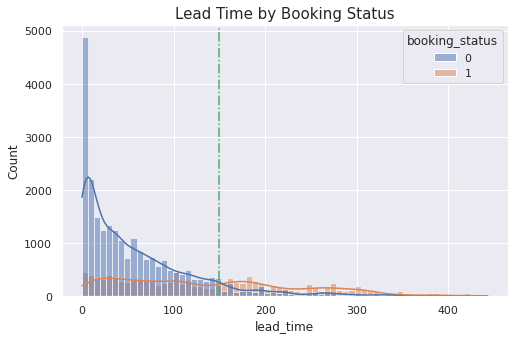

In [ ]:
plott('Lead Time by Booking Status')
sns.histplot(data=inn,
             x='lead_time',
             hue='booking_status',
             kde=True)
plt.axvline(x=150,color='g',linestyle='-.');

With greater lead time, the likelyhood of cancelling far exceeds that of keeping the booking. INN Hotels could implement several profitable policies:

* Bookings could be limited to at most five months (150 days) in advance. The dashed green horizontal line in the plot above delineates 150 days lead time. It is around this point that there are more kept reservations than cancelled ones. Limiting lead time to five months or less would keep the number of cancelled reservations always lower than kept reservations.

* If INN Hotels did not want to limit lead time, they could implement a non-refundable advanced booking fee. This would act as an insurance policy against profit loss in the event that the reservation is cancelled.

* In fact, the advanced booking fee could be a deposit on the reservation. This is simply a partial payment up front for guests that keep their reservation, so they aren't losing out by booking early. And for those who do cancel, INN Hotels recover some of the lost revenue.

In [ ]:
print('Booking Status for Online Reservations')
print('='*10)
inn.groupby('market_segment_type')['booking_status'].value_counts(normalize=True)['Online']

Booking Status for Online Reservations


0    0.634805
1    0.365195
Name: booking_status, dtype: float64

A little over a third of online reservations are cancelled. Utilizing the flexibility of online booking could help retain bookings and fill empty spots:

* INN Hotels could use their online platform to offer flash sales on rooms that recently suffered a cancellation. The immediacy available with an online system would help INN Hotels recover some of the revenue lost in the cancellation.

* The webpage could be redesigned to make the reservation more appealing. Possibilities include showing off hotel amenities and local attractions.

* INN Hotels could use email or other digital communication tools to keep their upcoming guests excited about their stay. As the reservation approaches, they could email the guest with updates pertaining to their reservation dates, such as local events. They could even email out offers only valid within the hotel, such as a free dessert with room service.

* Online reservations could redirect to a webpage detailing local museums or restaurants. INN Hotels could even partner with local vendors to offer upcoming guests coupons, such as a discounted walking tour. This would generate further investment in the booking, potentially decreasing the likelihood of cancellation.

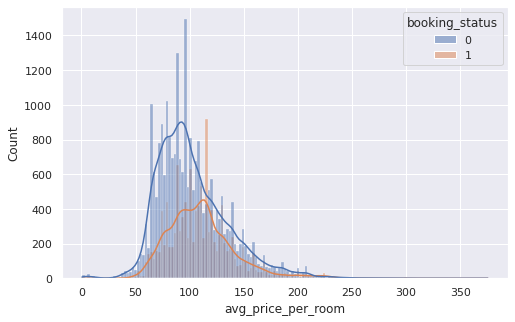

In [ ]:
plott()
sns.histplot(data=inn,
             x='avg_price_per_room',
             hue='booking_status',
             kde=True);

Cancelled bookings tend to have higher average prices per room (note the peaks of the KDEs above). If these were all fully refunded, INN Hotels would lose out extra, since they would be refunding their more expensive offerings. One way to cut down on loss would be to charge a penalty for cancelling a booking.

What's more, the penalty could be greater for higher priced rooms, thus accounting for the greater profit loss. Implementation here is key: INN Hotels cannot look like they are unfairly charging a greater penalty based on room cost (this could look greedy). To get around this barrier, the hotel group could calculate the cancellation fee as a fixed percentage of the room price. Then higher priced rooms garner a greater return on cancellations, proportional to the revenue lost on the booking.